# Telecom Churn Group Case Study

#### Business Goal:

We need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, customer attrition is referred to as `churn`.

**The Steps we will follow in this assignment as:**
1. Reading, understanding
2. Data Cleaning & EDA
3. Data Visualization
4. Data Preperation
5. Model Building
  - Logistic Regression
  - Decission Tree
  - Random Forest
  - Adaboost
6. Conclusion

### 1. Reading & Understanding given dataset

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
pd.options.display.max_rows = 200
pd.options.display.max_columns = 200
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing all datasets
train_data = pd.read_csv("train.csv", encoding = 'utf-8')
test_data = pd.read_csv("test.csv", encoding = 'utf-8')

In [3]:
train_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [4]:
# Shape of the train & test data

train_data.shape

(69999, 172)

In [5]:
test_data.shape

(30000, 171)

In [6]:
# create backup of data
train_data_original = train_data.copy()
test_data_original = test_data.copy()

In [7]:
# create column name list by types of columns
id_cols = ['id','circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8']

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8']
num_cols = [column for column in train_data.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print(" #ID cols: %d\n #Date cols:%d\n #Numeric cols:%d\n #Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == train_data.shape[1])

 #ID cols: 2
 #Date cols:9
 #Numeric cols:155
 #Category cols:6
True


### Let's understand the structure of our dataframe

In [8]:
# Let's see the head of our train data dataset
train_data.describe(include='all')

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count   69999.000000    69999.0         69297.0         69297.0   
unique           NaN        NaN             NaN             NaN   
top              NaN        NaN             NaN             NaN   
freq             NaN        NaN             NaN             NaN   
mean    34999.000000      109.0             0.0             0.0   
std     20207.115084        0.0             0.0             0.0   
min         0.000000      109.0             0.0             0.0   
25%     17499.500000      109.0             0.0             0.0   
50%     34999.000000      109.0             0.0             0.0   
75%     52498.500000      109.0             0.0             0.0   
max     69998.000000      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          69297.0                69999                69600   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                69999                69600   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8        arpu_6        arpu_7        arpu_8  \
count                 69266  69999.000000  69999.000000  69999.000000   
unique                    1           NaN           NaN           NaN   
top               8/31/2014           NaN           NaN           NaN   
freq                  69266           NaN           NaN           NaN   
mean                    NaN    283.134365    278.185912    278.858826   
std                     NaN    334.213918    344.366927    351.924315   
min                     NaN  -2258.709000  -1289.715000   -945.808000   
25%                     NaN     93.581000     86.714000     84.095000   
50%                     NaN    197.484000    191.588000    192.234000   
75%                     NaN    370.791000    365.369500    369.909000   
max                     NaN  27731.088000  35145.834000  33543.624000   

         onnet_mou_6   onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  \
count   67231.000000  67312.000000  66296.000000  67231.000000  67312.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      133.153275    133.894438    132.978257    198.874771    197.153383   
std       299.963093    311.277193    311.896596    316.818355    322.482226   
min         0.000000      0.000000      0.000000      0.000000      0.000000   
25%         7.410000      6.675000      6.410000     34.860000     32.240000   
50%        34.110000     32.280000     32.100000     96.480000     91.885000   
75%       119.390000    115.837500    115.060000    232.990000    227.630000   
max      7376.710000   8157.780000  10752.560000   8362.360000   7043.980000   

        offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
count   66296.000000   67231.000000   67312.000000   66296.000000   
unique           NaN            NaN            NaN            NaN   
top              NaN            NaN            NaN            NaN   
freq             NaN            NaN            NaN            NaN   
mean      196.543577       9.765435       7.014568       7.004892   
std       324.089234      57.374429      55.960985      53.408135   
min         0.000000       0.000000       0.000000       0.000000   
25%   

In [9]:
train_data.shape

(69999, 172)

Checking the data type for given dataset

In [10]:
# Check for column details
train_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    id                        69999 non-null  int64  
 1    circle_id                 69999 non-null  int64  
 2    loc_og_t2o_mou            69297 non-null  float64
 3    std_og_t2o_mou            69297 non-null  float64
 4    loc_ic_t2o_mou            69297 non-null  float64
 5    last_date_of_month_6      69999 non-null  object 
 6    last_date_of_month_7      69600 non-null  object 
 7    last_date_of_month_8      69266 non-null  object 
 8    arpu_6                    69999 non-null  float64
 9    arpu_7                    69999 non-null  float64
 10   arpu_8                    69999 non-null  float64
 11   onnet_mou_6               67231 non-null  float64
 12   onnet_mou_7               67312 non-null  float64
 13   onnet_mou_8               66296 non-null  fl

#### Checking Null values

In [11]:
round(train_data.isnull().mean()*100,2) 

id                           0.00
circle_id                    0.00
loc_og_t2o_mou               1.00
std_og_t2o_mou               1.00
loc_ic_t2o_mou               1.00
last_date_of_month_6         0.00
last_date_of_month_7         0.57
last_date_of_month_8         1.05
arpu_6                       0.00
arpu_7                       0.00
arpu_8                       0.00
onnet_mou_6                  3.95
onnet_mou_7                  3.84
onnet_mou_8                  5.29
offnet_mou_6                 3.95
offnet_mou_7                 3.84
offnet_mou_8                 5.29
roam_ic_mou_6                3.95
roam_ic_mou_7                3.84
roam_ic_mou_8                5.29
roam_og_mou_6                3.95
roam_og_mou_7                3.84
roam_og_mou_8                5.29
loc_og_t2t_mou_6             3.95
loc_og_t2t_mou_7             3.84
loc_og_t2t_mou_8             5.29
loc_og_t2m_mou_6             3.95
loc_og_t2m_mou_7             3.84
loc_og_t2m_mou_8             5.29
loc_og_t2f_mou

In [12]:
print(round(train_data.isnull().sum()*100/len(train_data),2).sort_values(ascending=False))

arpu_3g_6                   74.90
count_rech_2g_6             74.90
night_pck_user_6            74.90
arpu_2g_6                   74.90
date_of_last_rech_data_6    74.90
total_rech_data_6           74.90
av_rech_amt_data_6          74.90
max_rech_data_6             74.90
count_rech_3g_6             74.90
fb_user_6                   74.90
night_pck_user_7            74.48
date_of_last_rech_data_7    74.48
total_rech_data_7           74.48
max_rech_data_7             74.48
fb_user_7                   74.48
count_rech_2g_7             74.48
count_rech_3g_7             74.48
arpu_3g_7                   74.48
av_rech_amt_data_7          74.48
arpu_2g_7                   74.48
count_rech_2g_8             73.69
av_rech_amt_data_8          73.69
night_pck_user_8            73.69
max_rech_data_8             73.69
total_rech_data_8           73.69
arpu_2g_8                   73.69
arpu_3g_8                   73.69
date_of_last_rech_data_8    73.69
fb_user_8                   73.69
count_rech_3g_

### High Value Customer as per revenue 

The customers who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [13]:
rech_col = [col for col in train_data.columns if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [14]:
# Though we have total amount of recharge for talktime we don't have that number for data, instead we have average and number of rechanrges
# so let's calculate that amount
train_data['total_data_rech_amt_6'] = train_data['av_rech_amt_data_6'] * train_data['total_rech_data_6']
train_data['total_data_rech_amt_7'] = train_data['av_rech_amt_data_7'] * train_data['total_rech_data_7']
train_data['total_data_rech_amt_8'] = train_data['av_rech_amt_data_8'] * train_data['total_rech_data_8']

# adding total amout of rechrage for talktime in testing
test_data['total_data_rech_amt_6'] = test_data['av_rech_amt_data_6'] * test_data['total_rech_data_6'] 
test_data['total_data_rech_amt_7'] = test_data['av_rech_amt_data_7'] * test_data['total_rech_data_7']
test_data['total_data_rech_amt_8'] = test_data['av_rech_amt_data_8'] * test_data['total_rech_data_8']

# Drop the columns already accounted for 
train_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis=1, inplace=True)

test_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis=1, inplace=True)
# Find Average recharge amount for good phase i.e 6th and 7th month
good_phase_average_rech_amt = ( train_data['total_rech_amt_6'].fillna(0) + train_data['total_rech_amt_7'].fillna(0) + 
                               train_data['total_data_rech_amt_6'].fillna(0) + train_data['total_data_rech_amt_7'].fillna(0) ) / 2

# 70 percentile of the good_phase_average_rech_amt data
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_avg_rech_amt_70}')

# Keep high value customer data
train_data = train_data[good_phase_average_rech_amt >= gd_phase_avg_rech_amt_70]

print(f'Shape of high value customer data: {train_data.shape}')

70 Percentile of recharge amount is : 477.5
Shape of high value customer data: (21013, 169)


### Tagging Churn

The churned customers (churn=1, else 0) based on the 3rd month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_8
- total_og_mou_8
- vol_2g_mb_8
- vol_3g_mb_8

In [15]:
# Seperating columns for the 8th month
month8_columns = [col for col in train_data.columns if '8' in col]

# Seperating the ic columns 
month8_ic_columns = [col for col in month8_columns if 'ic' in col and 'mou' in col]

# Seperating oc columns
month8_oc_columns = [col for col in month8_columns if 'oc' in col and 'mou' in col]

# Seperating vol columns
month8_vol_columns = [col for col in month8_columns if 'vol' in col and 'mb' in col]
# Sum of all the ic columns
train_data['ic_sum'] = train_data[month8_ic_columns].sum(axis = 1)
test_data['ic_sum'] = test_data[month8_ic_columns].sum(axis = 1)
# Sum of all the oc columns
train_data['oc_sum'] = train_data[month8_oc_columns].sum(axis = 1)
test_data['oc_sum'] = test_data[month8_oc_columns].sum(axis = 1)
# Sum of all the vol columns
train_data['vol_sum'] = train_data[month8_vol_columns].sum(axis = 1)
test_data['vol_sum'] = test_data[month8_vol_columns].sum(axis = 1)

## 2. Data Cleaning & EDA

In [16]:
# Checking for missing values
msng_values = round(train_data.isna().sum() / len(train_data) * 100, 2).sort_values(ascending=False)
msng_values

count_rech_2g_8             46.79
arpu_3g_8                   46.79
fb_user_8                   46.79
arpu_2g_8                   46.79
date_of_last_rech_data_8    46.79
night_pck_user_8            46.79
total_data_rech_amt_8       46.79
count_rech_3g_8             46.79
max_rech_data_8             46.79
arpu_2g_6                   44.39
total_data_rech_amt_6       44.39
fb_user_6                   44.39
max_rech_data_6             44.39
count_rech_2g_6             44.39
date_of_last_rech_data_6    44.39
night_pck_user_6            44.39
count_rech_3g_6             44.39
arpu_3g_6                   44.39
count_rech_2g_7             43.28
arpu_2g_7                   43.28
arpu_3g_7                   43.28
fb_user_7                   43.28
date_of_last_rech_data_7    43.28
night_pck_user_7            43.28
total_data_rech_amt_7       43.28
max_rech_data_7             43.28
count_rech_3g_7             43.28
std_og_mou_8                 3.91
loc_ic_mou_8                 3.91
isd_og_mou_8  

In [17]:
# Checking for missing values
msng_values_test = round(test_data.isna().sum() / len(test_data) * 100, 2).sort_values(ascending=False)
msng_values_test

max_rech_data_6             74.72
arpu_3g_6                   74.72
date_of_last_rech_data_6    74.72
total_data_rech_amt_6       74.72
night_pck_user_6            74.72
count_rech_2g_6             74.72
arpu_2g_6                   74.72
fb_user_6                   74.72
count_rech_3g_6             74.72
count_rech_3g_7             74.31
max_rech_data_7             74.31
count_rech_2g_7             74.31
date_of_last_rech_data_7    74.31
fb_user_7                   74.31
night_pck_user_7            74.31
arpu_2g_7                   74.31
arpu_3g_7                   74.31
total_data_rech_amt_7       74.31
date_of_last_rech_data_8    73.59
fb_user_8                   73.59
arpu_3g_8                   73.59
count_rech_2g_8             73.59
count_rech_3g_8             73.59
total_data_rech_amt_8       73.59
arpu_2g_8                   73.59
max_rech_data_8             73.59
night_pck_user_8            73.59
std_og_t2f_mou_8             5.58
loc_ic_t2f_mou_8             5.58
std_og_mou_8  

In [18]:
# Select columns with more than 40% missing values
drop_msng_col = msng_values[msng_values > 40].index.tolist()
drop_msng_col

['count_rech_2g_8',
 'arpu_3g_8',
 'fb_user_8',
 'arpu_2g_8',
 'date_of_last_rech_data_8',
 'night_pck_user_8',
 'total_data_rech_amt_8',
 'count_rech_3g_8',
 'max_rech_data_8',
 'arpu_2g_6',
 'total_data_rech_amt_6',
 'fb_user_6',
 'max_rech_data_6',
 'count_rech_2g_6',
 'date_of_last_rech_data_6',
 'night_pck_user_6',
 'count_rech_3g_6',
 'arpu_3g_6',
 'count_rech_2g_7',
 'arpu_2g_7',
 'arpu_3g_7',
 'fb_user_7',
 'date_of_last_rech_data_7',
 'night_pck_user_7',
 'total_data_rech_amt_7',
 'max_rech_data_7',
 'count_rech_3g_7']

In [19]:
# Select columns with more than 40% missing values for test dataset
drop_msng_col_test = msng_values_test[msng_values_test > 40].index.tolist()
drop_msng_col_test

['max_rech_data_6',
 'arpu_3g_6',
 'date_of_last_rech_data_6',
 'total_data_rech_amt_6',
 'night_pck_user_6',
 'count_rech_2g_6',
 'arpu_2g_6',
 'fb_user_6',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'max_rech_data_7',
 'count_rech_2g_7',
 'date_of_last_rech_data_7',
 'fb_user_7',
 'night_pck_user_7',
 'arpu_2g_7',
 'arpu_3g_7',
 'total_data_rech_amt_7',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'arpu_3g_8',
 'count_rech_2g_8',
 'count_rech_3g_8',
 'total_data_rech_amt_8',
 'arpu_2g_8',
 'max_rech_data_8',
 'night_pck_user_8']

In [20]:
# Drop columns > 40% missing
train_data.drop(drop_msng_col, axis=1, inplace=True)
train_data.shape

(21013, 145)

In [21]:
# Drop columns > 40% missing
test_data.drop(drop_msng_col_test, axis=1, inplace=True)
test_data.shape

(30000, 144)

In [22]:
# Re-check missing values
round(train_data.isna().sum() / len(train_data) * 100, 2).sort_values(ascending=False)

loc_og_t2c_mou_8        3.91
roam_ic_mou_8           3.91
std_ic_t2m_mou_8        3.91
loc_og_mou_8            3.91
std_og_t2m_mou_8        3.91
std_og_t2f_mou_8        3.91
std_ic_t2f_mou_8        3.91
loc_og_t2f_mou_8        3.91
std_og_t2c_mou_8        3.91
loc_og_t2m_mou_8        3.91
std_ic_t2t_mou_8        3.91
loc_og_t2t_mou_8        3.91
std_ic_t2o_mou_8        3.91
std_og_mou_8            3.91
roam_og_mou_8           3.91
std_og_t2t_mou_8        3.91
isd_og_mou_8            3.91
spl_ic_mou_8            3.91
offnet_mou_8            3.91
std_ic_mou_8            3.91
loc_ic_t2t_mou_8        3.91
spl_og_mou_8            3.91
onnet_mou_8             3.91
loc_ic_mou_8            3.91
og_others_8             3.91
ic_others_8             3.91
loc_ic_t2m_mou_8        3.91
loc_ic_t2f_mou_8        3.91
isd_ic_mou_8            3.91
std_og_t2c_mou_6        1.89
std_og_t2f_mou_6        1.89
loc_ic_t2t_mou_6        1.89
std_ic_t2t_mou_6        1.89
loc_ic_t2f_mou_6        1.89
std_ic_t2m_mou

Since rest of columns have even less than `4% `of the data missing we can drop the rows with the missing values

In [23]:
# Drop rows with missing values
for col in train_data.columns:
    train_data = train_data[~train_data[col].isna()]
    
# Re-check missing values
round(train_data.isna().sum() / len(train_data) * 100, 2).sort_values(ascending=False)

id                      0.0
loc_ic_t2f_mou_8        0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
spl_ic_mou_8            0.0
isd_ic_mou_6            0.0
isd_ic_mou_7            0.0
isd_ic_mou_8            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
total_rech_num_6        0.0
total_rech_num_7        0.0
total_rech_num_8        0.0
total_rech_amt_6        0.0
total_ic_mou_6          0.0
std_ic_mou_8            0.0
std_ic_mou_7            0.0
std_ic_t2m_mou_7        0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_8        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2m_mou_8        0.0
std_ic_mou_6            0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2o_mou_6        0.0
std_ic_t2o_mou_7        0.0
std_ic_t2o_mou_8        0.0
total_rech_amt_7    

In [24]:
# The date columns don't add any value excpet for marking the last day of the period so we will drop them
date_col = [col for col in train_data.columns if 'date' in col]
train_data.drop(date_col, axis=1, inplace=True)
[col for col in train_data.columns if 'date' in col]

[]

In [25]:
# The date columns don't add any value excpet for marking the last day of the period so we will drop them 
date_col = [col for col in test_data.columns if 'date' in col] 
test_data.drop(date_col, axis=1, inplace=True)
[col for col in test_data.columns if 'date' in col]

[]

In [26]:
print(train_data.shape)
print(test_data.shape)
train_data.head(20)

(19721, 139)
(30000, 138)


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
4    4        109             0.0             0.0             0.0   240.708   
15  15        109             0.0             0.0             0.0   580.549   
23  23        109             0.0             0.0             0.0  1130.948   
24  24        109             0.0             0.0             0.0   371.974   
27  27        109             0.0             0.0             0.0   390.489   
39  39        109             0.0             0.0             0.0   348.187   
45  45        109             0.0             0.0             0.0  1361.775   
49  49        109             0.0             0.0             0.0   396.336   
52  52        109             0.0             0.0             0.0   511.711   
53  53        109             0.0             0.0             0.0   687.930   
57  57        109             0.0             0.0             0.0   420.095   
63  63        109             0.0             0.0             0.0   241.317   
68  68        109             0.0             0.0             0.0   693.378   
74  74        109             0.0             0.0             0.0   156.101   
75  75        109             0.0             0.0             0.0  1032.062   
78  78        109             0.0             0.0             0.0  1677.059   
79  79        109             0.0             0.0             0.0   900.286   
80  80        109             0.0             0.0             0.0   384.180   
81  81        109             0.0             0.0             0.0   475.926   
84  84        109             0.0             0.0             0.0   637.800   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
4    128.191   101.565        21.28         4.83         6.13         56.99   
15   377.294   338.286        10.43        24.99       194.43        317.11   
23   905.506   479.762       859.53       372.71         0.89        293.46   
24   352.069   240.449        93.18        38.29        29.86        531.19   
27   350.985   421.300         8.58        11.48        12.68        133.16   
39   630.031   974.914        64.66       598.74       565.66         37.83   
45  1658.481  1317.325       872.16       546.06      1078.93        410.56   
49   681.418   556.464       119.06       198.08       179.56        537.26   
52   395.991   432.337       800.44       532.08       690.84        167.06   
53   890.334   690.679       104.84       170.21       122.41        149.78   
57   479.535   332.430        27.34        95.66        53.54        177.53   
63   142.114   185.145         7.91         3.41         4.08         11.48   
68   434.528     0.250      1036.49       656.21         1.49        300.94   
74   321.727   602.819         0.00         3.64         2.01         51.41   
75   483.590   640.408       552.53       290.29       805.76        155.31   
78   639.889   695.511       120.01       155.68       278.46       1600.31   
79  1062.752   738.114      1497.71      2058.68      1181.04        496.61   
80   500.546   485.113        13.33         6.24         6.41        291.26   
81   507.195   540.243       708.18       553.74       609.61        434.58   
84   480.074     0.000      1241.99      1026.66         0.00        112.91   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
4          38.11          9.63          53.64           0.00           0.00   
15        341.79        197.09           0.00           0.00           0.00   
23        450.11        386.91           0.00           0.00           0.00   
24        507.76        222.03           0.00           0.00           0.00   
27        158.73        182.83           0.00           0.00           0.00   
39        339.28        558.59           0.00           0.00           0.00   
45        420.19        225.53           8.83         149.04           0.00   
49       1059.59        967.99           0.00       

By looking at the dataframe we can see a few of the columns, like circle_id have only value. These kind of feature suggest no variance and hence wont be contributing anything to our target variable.

In [27]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in train_data.columns:
    if train_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [28]:
# Check columns for only 1 unique value
drop_col_sngl_val_test = []

for col in test_data.columns:
    if test_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val_test.append(col)

drop_col_sngl_val_test

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [29]:
# Drop single value columns
train_data.drop(drop_col_sngl_val, axis=1, inplace=True)
train_data.shape

(19721, 129)

In [30]:
# Drop single value columns
test_data.drop(drop_col_sngl_val_test, axis=1, inplace=True)
test_data.shape

(30000, 128)

Let us check the correlation between the features and if we find any feature with high correlation we will go ahead and drop them

In [31]:
corr = train_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7       arpu_6          0.759204
arpu_8       arpu_6          0.691758
             arpu_7          0.799922
onnet_mou_7  onnet_mou_6     0.768807
onnet_mou_8  onnet_mou_6     0.653300
                               ...   
oc_sum       ic_sum          0.742855
vol_sum      vol_3g_mb_6     0.610577
             vol_3g_mb_7     0.696495
             vol_3g_mb_8     0.941763
             monthly_3g_8    0.606652
Length: 235, dtype: float64

In [32]:
corr_test = test_data.corr()
corr_test.loc[:, :] = np.tril(corr_test, -1)
corr_test = corr_test.stack()
high_corr_value_test = corr_test[(corr_test > 0.60) | (corr_test < -0.60)]
high_corr_value_test

arpu_7       arpu_6          0.701391
arpu_8       arpu_6          0.609394
             arpu_7          0.733413
onnet_mou_7  onnet_mou_6     0.756702
onnet_mou_8  onnet_mou_6     0.607448
                               ...   
oc_sum       ic_sum          0.772573
vol_sum      vol_3g_mb_7     0.671370
             vol_3g_mb_8     0.933151
             monthly_3g_8    0.620885
             aug_vbc_3g      0.631478
Length: 240, dtype: float64

In [33]:
# List of columns that are explained well by other columns
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'std_og_t2m_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'std_ic_t2m_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'total_rech_amt_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8']

# Drop the high corr columns
train_data.drop(drop_col_corr, axis=1, inplace=True)
train_data.shape

(19721, 90)

In [34]:
# Drop the high corr columns of test data
test_data.drop(drop_col_corr, axis=1, inplace=True)
test_data.shape

(30000, 89)

In [35]:
train_data.head()

id    arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
4    4   240.708  128.191  101.565        21.28         4.83         6.13   
15  15   580.549  377.294  338.286        10.43        24.99       194.43   
23  23  1130.948  905.506  479.762       859.53       372.71         0.89   
24  24   371.974  352.069  240.449        93.18        38.29        29.86   
27  27   390.489  350.985  421.300         8.58        11.48        12.68   

    offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
4          56.99         38.11          9.63          53.64            0.0   
15        317.11        341.79        197.09           0.00            0.0   
23        293.46        450.11        386.91           0.00            0.0   
24        531.19        507.76        222.03           0.00            0.0   
27        133.16        158.73        182.83           0.00            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4             0.0          15.73            0.0            0.0   
15            0.0           0.00            0.0            0.0   
23            0.0           0.00            0.0            0.0   
24            0.0           0.00            0.0            0.0   
27            0.0           0.00            0.0            0.0   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
4                0.0              9.85              0.00         58.91   
15               0.0              0.00              0.00        327.46   
23               0.0              0.00              0.00        950.91   
24               0.0              0.00              0.36        252.48   
27               0.0              0.00              0.00        139.21   

    loc_og_mou_7  loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
4          25.94         15.76               0.0               0.0   
15        366.79        385.26               0.0               0.0   
23        822.78        387.79               0.0               0.0   
24        257.74        129.73               0.0               0.0   
27        170.21        195.51               0.0               0.0   

    std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
4               0.00          4.35          0.00          0.00           0.0   
15              6.26          0.00          0.00          6.26           0.0   
23              0.00        202.08          0.00          0.00           0.0   
24              0.00        371.89        288.31        121.79           0.0   
27              0.00          2.53          0.00          0.00           0.0   

    isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
4            0.0           0.0          0.00         17.00          0.00   
15           0.0           0.0          0.08          0.00          0.00   
23           0.0           0.0          0.00          0.05          0.01   
24           0.0           0.0          0.00          0.00          0.36   
27           0.0           0.0          0.00          0.00          0.00   

    og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  \
4           0.0          0.0          0.0         21.54          9.36   
15          0.1          0.0          0.0        233.18        776.36   
23          0.0          0.0          0.0        391.38        448.21   
24          0.0          0.0          0.0        223.11        146.09   
27          0.0          0.0          0.0        268.04        366.03   

    loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
4          28.31               0.0               0.0               0.0   
15        629.94               0.0               0.0               0.0   
23        202.89               0.0               0.0               0.0   
24        171.01               0.0               0.0               0.0   
27        350.46               0.0               0.0          

### Driving new features

In [36]:
# Create a total mou instead of offnet and onnet

train_data['total_mou_6'] = train_data['onnet_mou_6'] + train_data['offnet_mou_6']
train_data['total_mou_7'] = train_data['onnet_mou_7'] + train_data['offnet_mou_7']
train_data['total_mou_8'] = train_data['onnet_mou_8'] + train_data['offnet_mou_8']

# Drop the redundant columns
train_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

train_data.head()

id    arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
4    4   240.708  128.191  101.565          53.64            0.0   
15  15   580.549  377.294  338.286           0.00            0.0   
23  23  1130.948  905.506  479.762           0.00            0.0   
24  24   371.974  352.069  240.449           0.00            0.0   
27  27   390.489  350.985  421.300           0.00            0.0   

    roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4             0.0          15.73            0.0            0.0   
15            0.0           0.00            0.0            0.0   
23            0.0           0.00            0.0            0.0   
24            0.0           0.00            0.0            0.0   
27            0.0           0.00            0.0            0.0   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
4                0.0              9.85              0.00         58.91   
15               0.0              0.00              0.00        327.46   
23               0.0              0.00              0.00        950.91   
24               0.0              0.00              0.36        252.48   
27               0.0              0.00              0.00        139.21   

    loc_og_mou_7  loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
4          25.94         15.76               0.0               0.0   
15        366.79        385.26               0.0               0.0   
23        822.78        387.79               0.0               0.0   
24        257.74        129.73               0.0               0.0   
27        170.21        195.51               0.0               0.0   

    std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
4               0.00          4.35          0.00          0.00           0.0   
15              6.26          0.00          0.00          6.26           0.0   
23              0.00        202.08          0.00          0.00           0.0   
24              0.00        371.89        288.31        121.79           0.0   
27              0.00          2.53          0.00          0.00           0.0   

    isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
4            0.0           0.0          0.00         17.00          0.00   
15           0.0           0.0          0.08          0.00          0.00   
23           0.0           0.0          0.00          0.05          0.01   
24           0.0           0.0          0.00          0.00          0.36   
27           0.0           0.0          0.00          0.00          0.00   

    og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  \
4           0.0          0.0          0.0         21.54          9.36   
15          0.1          0.0          0.0        233.18        776.36   
23          0.0          0.0          0.0        391.38        448.21   
24          0.0          0.0          0.0        223.11        146.09   
27          0.0          0.0          0.0        268.04        366.03   

    loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
4          28.31               0.0               0.0               0.0   
15        629.94               0.0               0.0               0.0   
23        202.89               0.0               0.0               0.0   
24        171.01               0.0               0.0               0.0   
27        350.46               0.0               0.0               0.4   

    std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  \
4               0.00              0.00               0.0          0.00   
15              0.00              1.03               0.0          0.00   
23              0.00              0.00               0.0        207.03   
24              0.00              0.00               0.0          6.96   
27             15.43              0.00               0.0         15.43   

    std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_i

In [37]:
test_data['total_mou_6'] = test_data['onnet_mou_6'] + test_data['offnet_mou_6']
test_data['total_mou_7'] = test_data['onnet_mou_7'] + test_data['offnet_mou_7']
test_data['total_mou_8'] = test_data['onnet_mou_8'] + test_data['offnet_mou_8']

# Drop the redundant columns
test_data.drop(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], axis=1, inplace=True)

test_data.head()

id   arpu_6   arpu_7   arpu_8  roam_ic_mou_6  roam_ic_mou_7  \
0  69999   91.882   65.330   64.445           0.00           0.00   
1  70000  414.168  515.568  360.868           0.00           0.00   
2  70001  329.844  434.884  746.239          22.81         103.38   
3  70002   43.550  171.390   24.400           0.00           0.00   
4  70003  306.854  406.289  413.329           0.00           0.00   

   roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0           0.00           0.00           0.00           0.00   
1           0.00           0.00           0.00           0.00   
2          26.08          24.53          53.68          54.44   
3           0.00           0.00           0.00           0.00   
4           0.00           0.00           0.00           0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
0         44.71         29.43               0.0               0.0   
1        639.29        397.11               0.0               0.0   
2          0.00          0.00               0.0               0.0   
3         98.61         22.86               0.0               0.0   
4          3.44         25.51               0.0               0.0   

   std_og_t2f_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  \
0               0.0         48.93          7.68         28.48           0.0   
1               0.0          0.00         23.76         17.68           0.0   
2               0.0          0.00          0.00          0.00           0.0   
3               0.0         37.09         96.53          0.00           0.0   
4               0.0        509.03        629.43        749.29           0.0   

   isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  \
0           0.0           0.0          0.00          0.00          0.03   
1           0.0           0.8          0.00          0.00          0.00   
2           0.0           0.0          0.00          0.00          0.00   
3           0.0           0.0          0.00         12.03          1.15   
4           0.0           0.0          0.71          5.39          4.96   

   og_others_6  og_others_7  og_others_8  loc_ic_mou_6  loc_ic_mou_7  \
0          0.0          0.0          0.0         40.81         42.16   
1          0.0          0.0          0.0        181.69        149.24   
2          0.0          0.0          0.0          0.00          0.00   
3          0.0          0.0          0.0        546.06        504.86   
4          2.2          0.0          0.0         10.13          9.59   

   loc_ic_mou_8  std_ic_t2t_mou_6  std_ic_t2t_mou_7  std_ic_t2t_mou_8  \
0         31.51              0.00              0.00              0.00   
1        187.43              0.00              0.00              0.00   
2          0.00              0.00              0.00              0.00   
3        531.64              0.00              4.26              0.00   
4         17.61             29.71             92.36            107.39   

   std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_t2f_mou_8  std_ic_mou_6  \
0               0.0               0.0              0.00          0.36   
1               0.0               0.0              0.00          0.00   
2               0.0               0.0              0.00          0.00   
3               0.0               0.0              0.00          9.63   
4               0.0               0.0              1.61         43.59   

   std_ic_mou_7  std_ic_mou_8  spl_ic_mou_6  spl_ic_mou_7  spl_ic_mou_8  \
0          1.04          4.34     

Since rest of the columns are break out of totals into granualr details we will not merge them into one, instead we will create new features that will each account for the good pahse by averaging out the values for `6th & 7th` month

In [38]:
# Seperate columns for 6th and 7th month
col_for_6_7 = [col[:-2] for col in train_data.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7):
    train_data[f'gd_ph_{col}'] = ( train_data[f'{col}_6'] + train_data[f'{col}_7'] ) / 2
    train_data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
train_data.head()

id   arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
4    4  101.565            0.0            0.0              0.00         15.76   
15  15  338.286            0.0            0.0              0.00        385.26   
23  23  479.762            0.0            0.0              0.00        387.79   
24  24  240.449            0.0            0.0              0.36        129.73   
27  27  421.300            0.0            0.0              0.00        195.51   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
4               0.00          0.00           0.0          0.00          0.0   
15              6.26          6.26           0.0          0.00          0.0   
23              0.00          0.00           0.0          0.01          0.0   
24              0.00        121.79           0.0          0.36          0.0   
27              0.00          0.00           0.0          0.00          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
4          28.31               0.0               0.0          0.00   
15        629.94               0.0               0.0          0.00   
23        202.89               0.0               0.0          0.00   
24        171.01               0.0               0.0         21.93   
27        350.46               0.4               0.0          0.40   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
4            0.0           0.0          0.0                 8              30   
15           0.0           0.0          0.0                 4             250   
23           0.0           0.0          0.4                10             144   
24           0.0           0.0          0.0                10              30   
27           0.0           0.0          0.0                 4             164   

    last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
4                   30       213.47             0            6             0   
15                 250       354.35             1            0             0   
23                  30         0.00             0            0             0   
24                  30         0.00             0            1             0   
27                  61        10.54             0            1             1   

    sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  \
4             0   647         0.0        0.00        0.00                  0   
15            0   602         0.0        0.00        0.00                  0   
23            0   455         0.0        0.00        0.00                  0   
24            0  1219         0.0        0.00        0.00                  0   
27            1   573       700.4      185.71      173.72                  0   

     ic_sum   oc_sum  vol_sum  total_mou_8  gd_ph_ic_others  gd_ph_vol_2g_mb  \
4     84.91    88.11   213.47        15.76            0.000          349.845   
15  1889.82  2030.39   354.35       391.52            0.000          130.210   
23   609.06  1181.34     0.00       387.80            0.075            0.000   
24   578.81   601.82     0.00       251.89            0.000            0.020   
27  1052.56  1091.91  1353.47       195.51            0.000           49.460   

    gd_ph_total_rech_num  gd_ph_loc_ic_mou  gd_ph_roam_og_mou  \
4                   11.5            15.450              7.865   
15                   4.0           504.770              0.000   
23                  22.5           419.795              0.000   
24                   7.0           184.600              0.000   
27                  10.5           317.035              0.000   

    gd_ph_std_og_mou  gd_ph_monthly_2g  gd_ph_loc_og_mou  gd_ph_total_mou  \
4              2.175               0.0            42.425           60.605   
15             0.000               0.5           347.125          347.160   
23           101.040               0.0           886.845          987

In [39]:
# Seperate columns for 6th and 7th month
col_for_6_7_test = [col[:-2] for col in test_data.columns if '6' in col or '7' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6_7_test):
    test_data[f'gd_ph_{col}'] = ( test_data[f'{col}_6'] + test_data[f'{col}_7'] ) / 2
    test_data.drop([f'{col}_6', f'{col}_7'], axis=1, inplace=True)
        
test_data.head()

id   arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  \
0  69999   64.445           0.00           0.00              0.03   
1  70000  360.868           0.00           0.00              0.00   
2  70001  746.239          26.08          54.44              0.00   
3  70002   24.400           0.00           0.00              0.00   
4  70003  413.329           0.00           0.00              0.00   

   loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  \
0         29.43               0.0         28.48           0.0          0.03   
1        397.11               0.0         17.68           0.8          0.00   
2          0.00               0.0          0.00           0.0          0.00   
3         22.86               0.0          0.00           0.0          1.15   
4         25.51               0.0        749.29           0.0          4.96   

   og_others_8  loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  \
0          0.0         31.51              0.00              0.00   
1          0.0        187.43              0.00              0.00   
2          0.0          0.00              0.00              0.00   
3          0.0        531.64              0.00              0.00   
4          0.0         17.61            107.39              1.61   

   std_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0          4.34          0.39          0.00         0.00                 4   
1          0.00          0.00         94.23         0.00                 5   
2          0.00          0.00          0.00         0.00                 5   
3          8.83          0.00          8.65         0.00                 2   
4        141.48          0.00          0.00         0.16                 8   

   max_rech_amt_8  last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  \
0              30                   0          0.0             0            0   
1             250                   0          0.0             0            0   
2             500                   0          0.0             0            0   
3               0                   0          0.0             0            0   
4             130                 130          0.0             0            0   

   monthly_3g_8  sachet_3g_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
0             0            0  1692        0.00        0.00        0.00   
1             0            0  2533        0.00        0.00        0.00   
2             0            0   277      525.61      758.41      241.84   
3             0            0  1244        0.00        0.00        0.00   
4             0            0   462        0.00        0.00        0.00   

    ic_sum   oc_sum  vol_sum  total_mou_8  gd_ph_ic_others  gd_ph_vol_2g_mb  \
0   108.35   121.90      0.0        57.94              0.0              0.0   
1   750.74  1169.06      0.0       414.78              0.0              0.0   
2    26.08     0.00      0.0        53.44              0.0              0.0   
3  1638.70  1108.98      0.0        24.01              0.0              0.0   
4   477.41    86.22      0.0       774.84              0.0              0.0   

   gd_ph_total_rech_num  gd_ph_loc_ic_mou  gd_ph_roam_og_mou  \
0                   5.0            41.485              0.000   
1                   4.5           165.465              0.000   
2                   7.5             0.000             39.105   
3                   4.0           525.460              0.000   
4                   9.0             9.860              0.000   

   gd_ph_std_og_mou  gd_ph_monthly_2g  gd_ph_loc_og_mou  gd_ph_total_mou  \
0            28.305               0.0            43.860           72.165   
1            11.880               0.0           594.575          606.450   
2             0.000               0.0             0.000           39.095   
3            66.810               0.0            53.435          126.260   
4           569.230               0.0             3.140          5

vbc columns doesn't have number of month as suffix so it seemed to have missed out let's avergae out the columns for this feature too

In [40]:
# Create new column
train_data['gd_ph_vbc_3g'] = ( train_data['jul_vbc_3g'] + train_data['jun_vbc_3g'] ) / 2
test_data['gd_ph_vbc_3g'] = ( test_data['jul_vbc_3g'] + test_data['jun_vbc_3g'] ) / 2
# Drop redundant column
train_data.drop(['jul_vbc_3g', 'jun_vbc_3g'], axis=1, inplace=True)
test_data.drop(['jul_vbc_3g', 'jun_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
train_data['vbc_3g_8'] = train_data['aug_vbc_3g']
train_data.drop('aug_vbc_3g', axis=1, inplace=True)

test_data['vbc_3g_8'] = test_data['aug_vbc_3g']
test_data.drop('aug_vbc_3g', axis=1, inplace=True)

train_data.head()

id   arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
4    4  101.565            0.0            0.0              0.00         15.76   
15  15  338.286            0.0            0.0              0.00        385.26   
23  23  479.762            0.0            0.0              0.00        387.79   
24  24  240.449            0.0            0.0              0.36        129.73   
27  27  421.300            0.0            0.0              0.00        195.51   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
4               0.00          0.00           0.0          0.00          0.0   
15              6.26          6.26           0.0          0.00          0.0   
23              0.00          0.00           0.0          0.01          0.0   
24              0.00        121.79           0.0          0.36          0.0   
27              0.00          0.00           0.0          0.00          0.0   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
4          28.31               0.0               0.0          0.00   
15        629.94               0.0               0.0          0.00   
23        202.89               0.0               0.0          0.00   
24        171.01               0.0               0.0         21.93   
27        350.46               0.4               0.0          0.40   

    spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
4            0.0           0.0          0.0                 8              30   
15           0.0           0.0          0.0                 4             250   
23           0.0           0.0          0.4                10             144   
24           0.0           0.0          0.0                10              30   
27           0.0           0.0          0.0                 4             164   

    last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
4                   30       213.47             0            6             0   
15                 250       354.35             1            0             0   
23                  30         0.00             0            0             0   
24                  30         0.00             0            1             0   
27                  61        10.54             0            1             1   

    sachet_3g_8   aon  churn_probability   ic_sum   oc_sum  vol_sum  \
4             0   647                  0    84.91    88.11   213.47   
15            0   602                  0  1889.82  2030.39   354.35   
23            0   455                  0   609.06  1181.34     0.00   
24            0  1219                  0   578.81   601.82     0.00   
27            1   573                  0  1052.56  1091.91  1353.47   

    total_mou_8  gd_ph_ic_others  gd_ph_vol_2g_mb  gd_ph_total_rech_num  \
4         15.76            0.000          349.845                  11.5   
15       391.52            0.000          130.210                   4.0   
23       387.80            0.075            0.000                  22.5   
24       251.89            0.000            0.020                   7.0   
27       195.51            0.000           49.460                  10.5   

    gd_ph_loc_ic_mou  gd_ph_roam_og_mou  gd_ph_std_og_mou  gd_ph_monthly_2g  \
4             15.450              7.865             2.175               0.0   
15           504.770              0.000             0.000               0.5   
23           419.795              0.000           101.040               0.0   
24           184.600              0.000           330.100               0.0   
27           317.035              0.000             1.265               0.5   

    gd_ph_loc_og_mou  gd_ph_total_mou  gd_ph_loc_og_t2c_mou  gd_ph_isd_ic_mou  \
4             42.425           60.605                 4.925               0.0   
15           347.125          347.160                 0.000               0.0   
23           886.845          987.905                 0.0

In [41]:
train_data.shape

(19721, 60)

In [42]:
test_data.shape

(30000, 59)

In [43]:
# Reset the index 
train_data.reset_index(inplace=True, drop=True)
test_data.reset_index(inplace=True, drop=True)
train_data.head()

id   arpu_8  roam_ic_mou_8  roam_og_mou_8  loc_og_t2c_mou_8  loc_og_mou_8  \
0   4  101.565            0.0            0.0              0.00         15.76   
1  15  338.286            0.0            0.0              0.00        385.26   
2  23  479.762            0.0            0.0              0.00        387.79   
3  24  240.449            0.0            0.0              0.36        129.73   
4  27  421.300            0.0            0.0              0.00        195.51   

   std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0              0.00          0.00           0.0          0.00          0.0   
1              6.26          6.26           0.0          0.00          0.0   
2              0.00          0.00           0.0          0.01          0.0   
3              0.00        121.79           0.0          0.36          0.0   
4              0.00          0.00           0.0          0.00          0.0   

   loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0         28.31               0.0               0.0          0.00   
1        629.94               0.0               0.0          0.00   
2        202.89               0.0               0.0          0.00   
3        171.01               0.0               0.0         21.93   
4        350.46               0.4               0.0          0.40   

   spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  max_rech_amt_8  \
0           0.0           0.0          0.0                 8              30   
1           0.0           0.0          0.0                 4             250   
2           0.0           0.0          0.4                10             144   
3           0.0           0.0          0.0                10              30   
4           0.0           0.0          0.0                 4             164   

   last_day_rch_amt_8  vol_2g_mb_8  monthly_2g_8  sachet_2g_8  monthly_3g_8  \
0                  30       213.47             0            6             0   
1                 250       354.35             1            0             0   
2                  30         0.00             0            0             0   
3                  30         0.00             0            1             0   
4                  61        10.54             0            1             1   

   sachet_3g_8   aon  churn_probability   ic_sum   oc_sum  vol_sum  \
0            0   647                  0    84.91    88.11   213.47   
1            0   602                  0  1889.82  2030.39   354.35   
2            0   455                  0   609.06  1181.34     0.00   
3            0  1219                  0   578.81   601.82     0.00   
4            1   573                  0  1052.56  1091.91  1353.47   

   total_mou_8  gd_ph_ic_others  gd_ph_vol_2g_mb  gd_ph_total_rech_num  \
0        15.76            0.000          349.845                  11.5   
1       391.52            0.000          130.210                   4.0   
2       387.80            0.075            0.000                  22.5   
3       251.89            0.000            0.020                   7.0   
4       195.51            0.000           49.460                  10.5   

   gd_ph_loc_ic_mou  gd_ph_roam_og_mou  gd_ph_std_og_mou  gd_ph_monthly_2g  \
0            15.450              7.865             2.175               0.0   
1           504.770              0.000             0.000               0.5   
2           419.795              0.000           101.040               0.0   
3           184.600              0.000           330.100               0.0   
4           317.035              0.000             1.265               0.5   

   gd_ph_loc_og_mou  gd_ph_total_mou  gd_ph_loc_og_t2c_mou  gd_ph_isd_ic_mou  \
0            42.425           60.605                 4.925               0.0   
1           347.125          347.160                 0.000               0.0   
2           886.845          987.905                 0.000               0.0   
3           255.110        

In [44]:
train_data.describe()

id        arpu_8  roam_ic_mou_8  roam_og_mou_8  \
count  19721.000000  19721.000000   19721.000000   19721.000000   
mean   35026.047107    526.971273      12.682434      20.308498   
std    20162.697419    518.976437      74.559522     107.504295   
min        4.000000   -345.129000       0.000000       0.000000   
25%    17604.000000    257.674000       0.000000       0.000000   
50%    35089.000000    445.339000       0.000000       0.000000   
75%    52417.000000    671.302000       0.000000       0.000000   
max    69997.000000  33543.624000    4169.810000    5337.040000   

       loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2f_mou_8  std_og_mou_8  \
count      19721.000000  19721.000000      19721.000000  19721.000000   
mean           1.765427    245.636900          1.620518    324.950037   
std            7.224700    366.765038         10.818013    613.319372   
min            0.000000      0.000000          0.000000      0.000000   
25%            0.000000     31.360000          0.000000      0.000000   
50%            0.000000    124.290000          0.000000     36.010000   
75%            0.110000    323.190000          0.000000    396.940000   
max          351.830000  11039.910000        354.160000  13980.060000   

       isd_og_mou_8  spl_og_mou_8   og_others_8  loc_ic_mou_8  \
count  19721.000000  19721.000000  19721.000000  19721.000000   
mean       2.160061      7.008838      0.059558    233.854286   
std       53.320961     22.146069      3.174474    306.486478   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000     51.360000   
50%        0.000000      0.700000      0.000000    140.380000   
75%        0.000000      6.610000      0.000000    300.010000   
max     5681.540000    954.510000    394.930000   5305.140000   

       std_ic_t2t_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  spl_ic_mou_8  \
count      19721.000000      19721.000000  19721.000000  19721.000000   
mean          14.542432          2.613050     46.139054      0.028566   
std           70.446593         19.563182    133.825996      0.109204   
min            0.000000          0.000000      0.000000      0.000000   
25%            0.000000          0.000000      0.960000      0.000000   
50%            0.310000          0.000000     10.640000      0.000000   
75%            7.710000          0.230000     41.130000      0.000000   
max         3423.390000       1394.890000   3777.940000      1.260000   

       isd_ic_mou_8   ic_others_8  total_rech_num_8  max_rech_amt_8  \
count  19721.000000  19721.000000      19721.000000    19721.000000   
mean      11.457453      1.328518         10.434359      163.420567   
std       72.007304     14.700453          9.221973      161.659409   
min        0.000000      0.000000          1.000000        0.000000   
25%        0.000000      0.000000          5.000000       67.000000   
50%        0.000000      0.000000          8.000000      130.000000   
75%        0.000000      0.060000         13.000000      198.000000   
max     3432.880000   1209.860000        138.000000     4449.000000   

       last_day_rch_amt_8   vol_2g_mb_8  monthly_2g_8   sachet_2g_8  \
count        19721.000000  19721.000000  19721.000000  19721.000000   
mean            93.787333    110.231243      0.159982      1.102074   
std            133.724358    321.638715      0.412179      2.580249   
min              0.000000      0.000000      0.000000      0.000000   
25%             10.000000      0.000000      0.000000      0.000000   
50%             50.000000      0.000000      0.000000      0.000000   
75%            130.000000     59.290000      0.000000      1.000000   
max           4449.000000  11117.610000      5.000000     44.000000   

       monthly_3g_8   sachet_3g_8           aon  churn_probability  \
count  19721.000000  19721.000000  19721.000000       19721.000000   
mean       0.206937      0.210841   1235.268039           0.055372   
std        0.615078  

In [45]:
test_data_org = test_data.copy()

#### Observation
- We can see almost every columns has some outliers, while most of them are becuase there are 0.0 as the service was not used some are actual outliers
- Since we don't have actuall bussines people to check the factfulness of the data, we will cap those features

### 3. Data Visualization

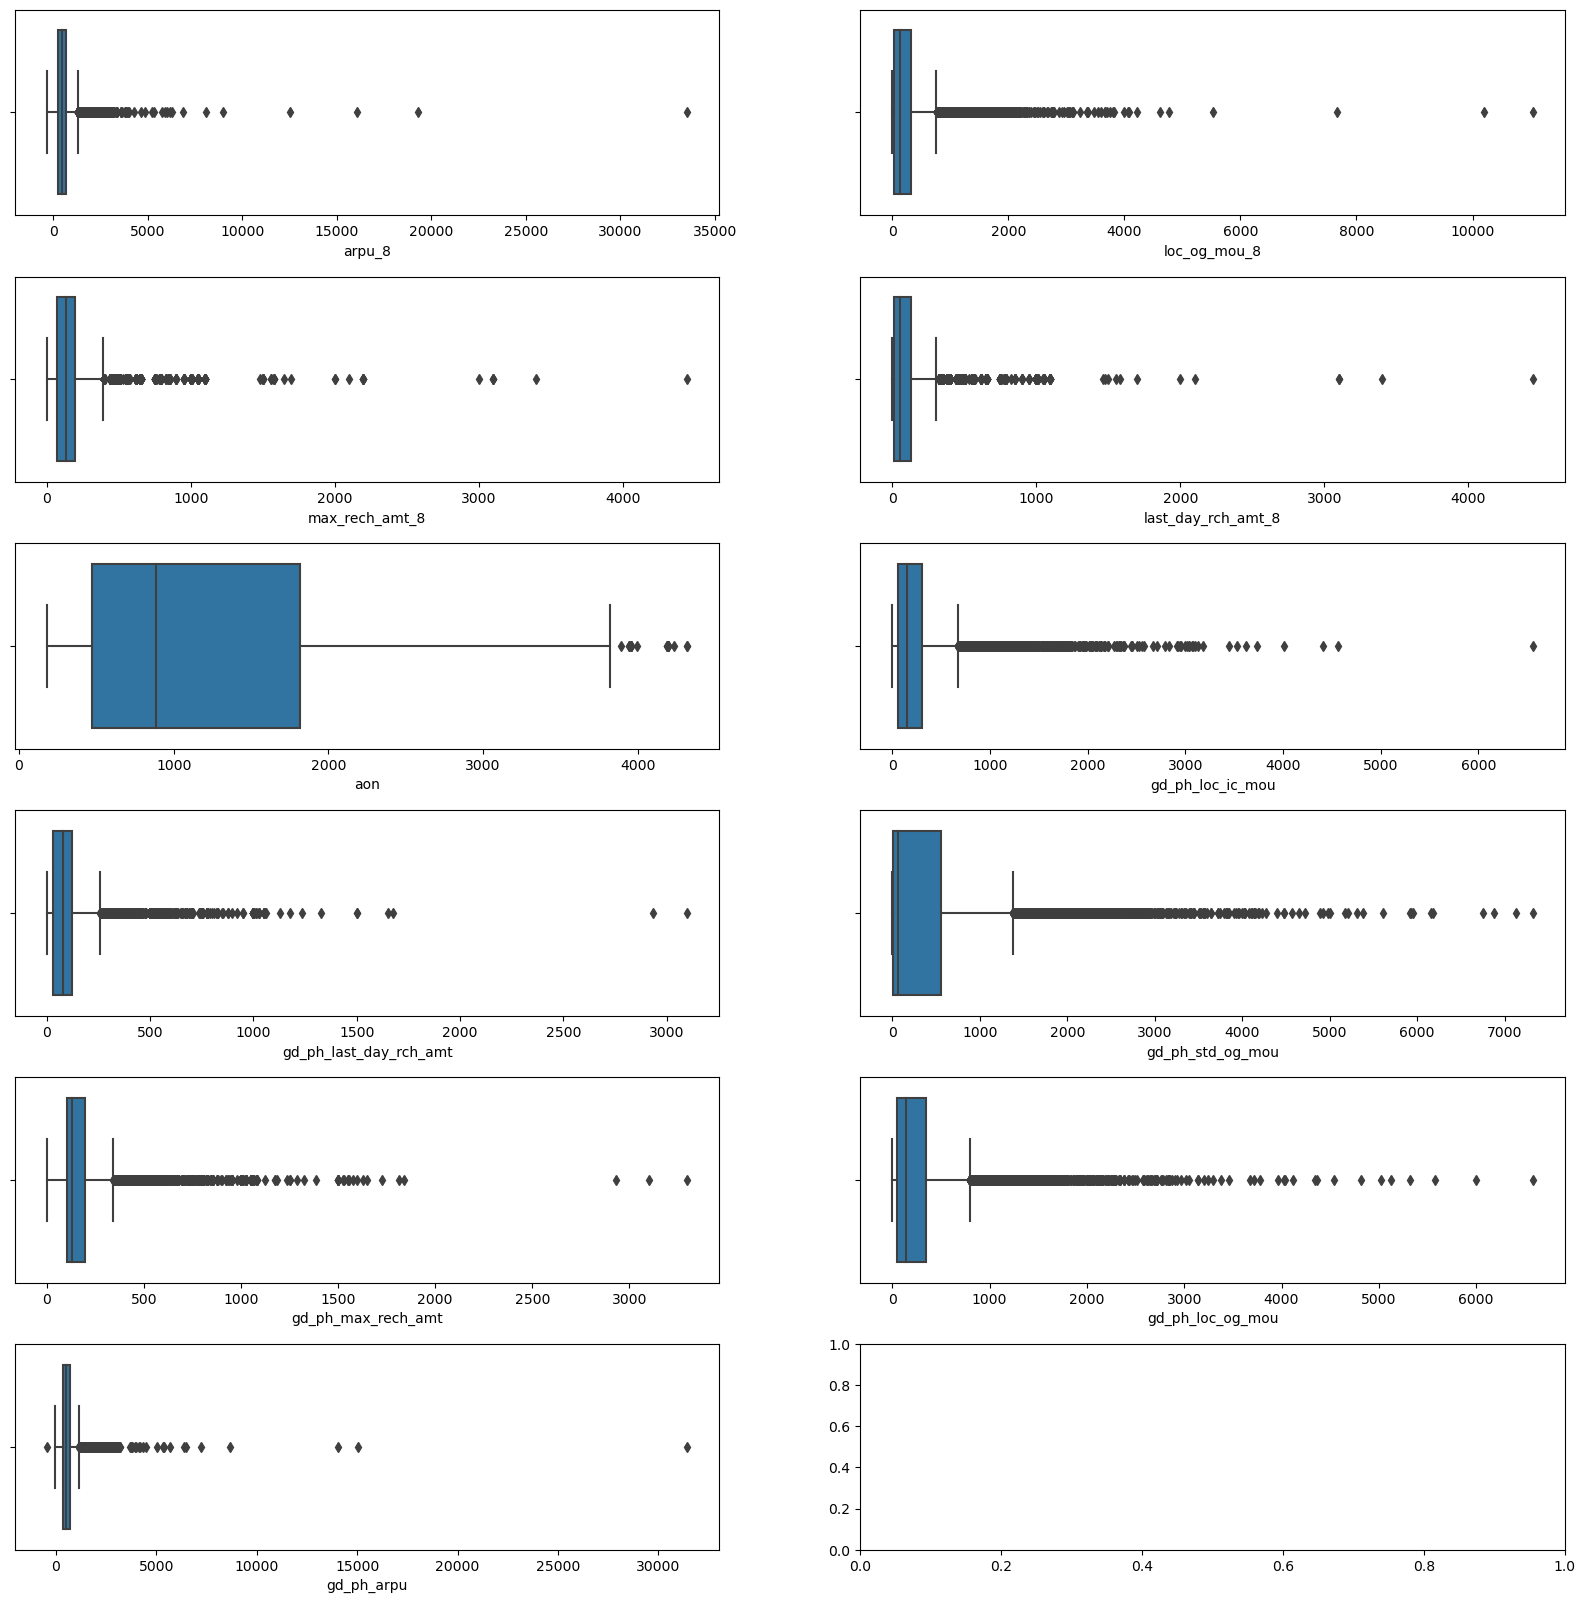

In [46]:
# Going through the output of describe we can filter out the features that needs a second look

# List of features to be analyzed
col_boxplot = ['arpu_8', 'loc_og_mou_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'aon', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
# sns.boxplot(x=churn_data['arpu_8'], ax=axes[0])
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(train_data[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

#### Observations
- From the above plots we can define following upper limits to the sepected variables
|Feature|Value |
|-------|------|
|arpu_8| 7000|
|loc_og_mou_8|	4000|
|max_rech_amt_8|	1000|
|last_day_rch_amt_8|	1000|
|aon|3000|
|total_mou_8|4000|
|gd_ph_loc_ic_mou|	3000|
|gd_ph_last_day_rch_amt|	1000|
|gd_ph_std_og_mou|	4000|
|gd_ph_max_rech_amt|	1500|
|gd_ph_loc_og_mou	|3000|
|gd_ph_arpu|7000|

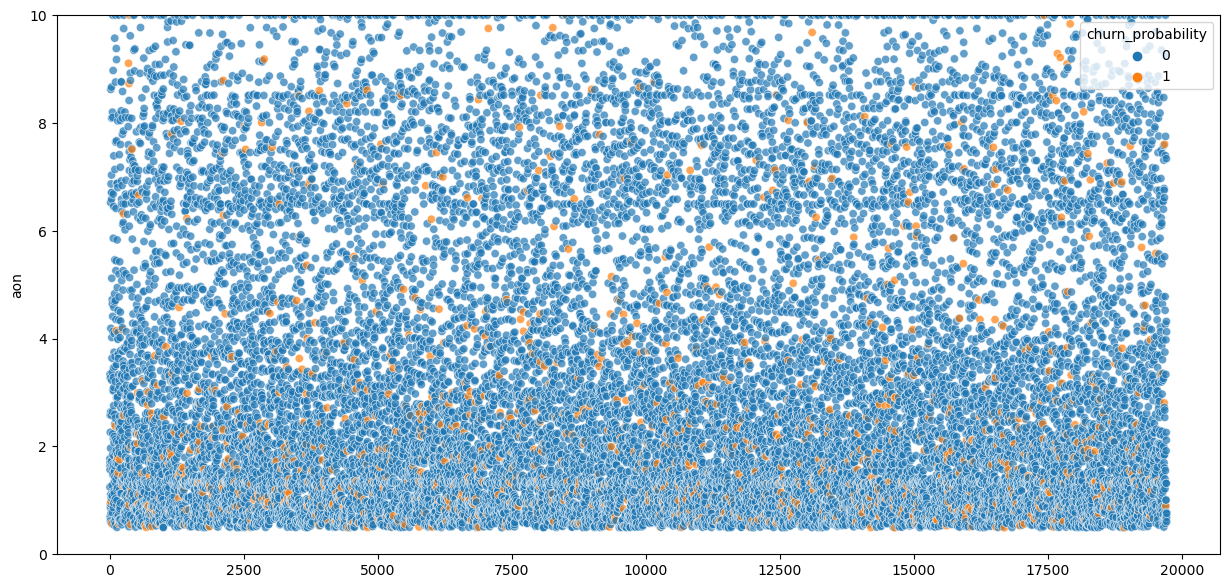

In [47]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=train_data['aon'] / 365, x=train_data.index, hue=train_data.churn_probability, alpha=0.7)
plt.ylim(0,10)
plt.show()

#### Observation
- Though we cannot see a clear pattern here, but we can notice that the mojority of churners had a tenure of less than 4 or 5 years

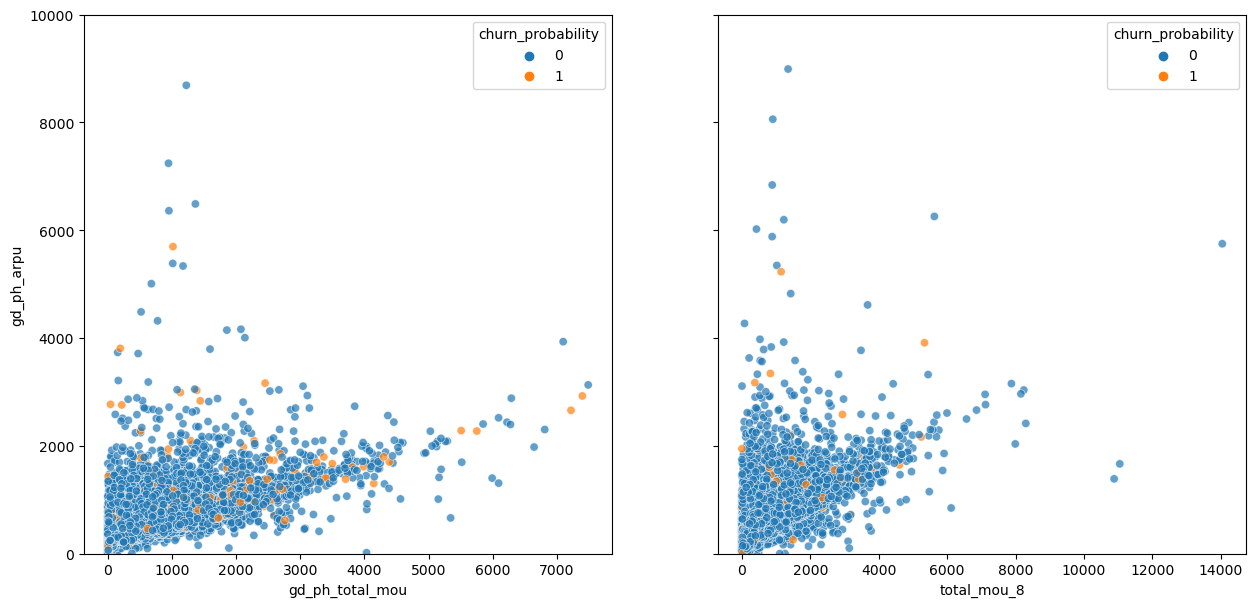

In [48]:
# Lets check how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=train_data, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_8', x='total_mou_8', data=train_data, ax=axes[1], hue='churn_probability', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

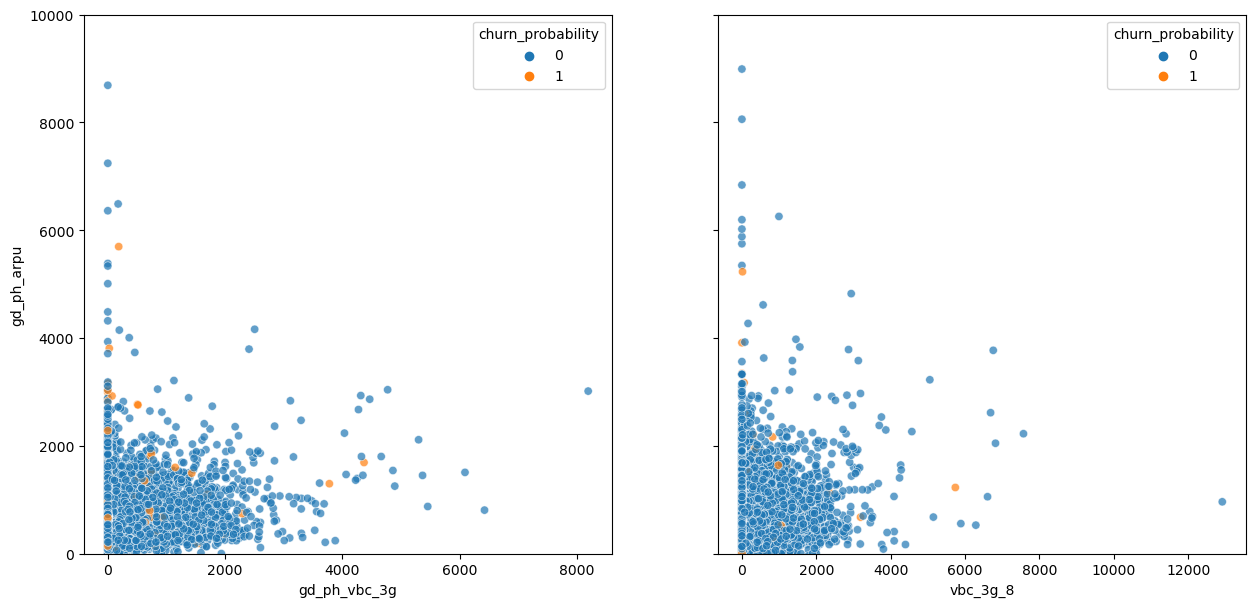

In [49]:
# Lets check how the total_mou effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=train_data, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=train_data, ax=axes[1], hue='churn_probability', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

#### Observation
 - We can clearly see that MOU have dropped significantly for the churners in the action pahse i.e 8th month, thus hitting the revenue generated from them
 - It is also interesting that though the MOU is between 0-2000, the revenue is highest in that region that tells us these users had other services that were boosting the revenue

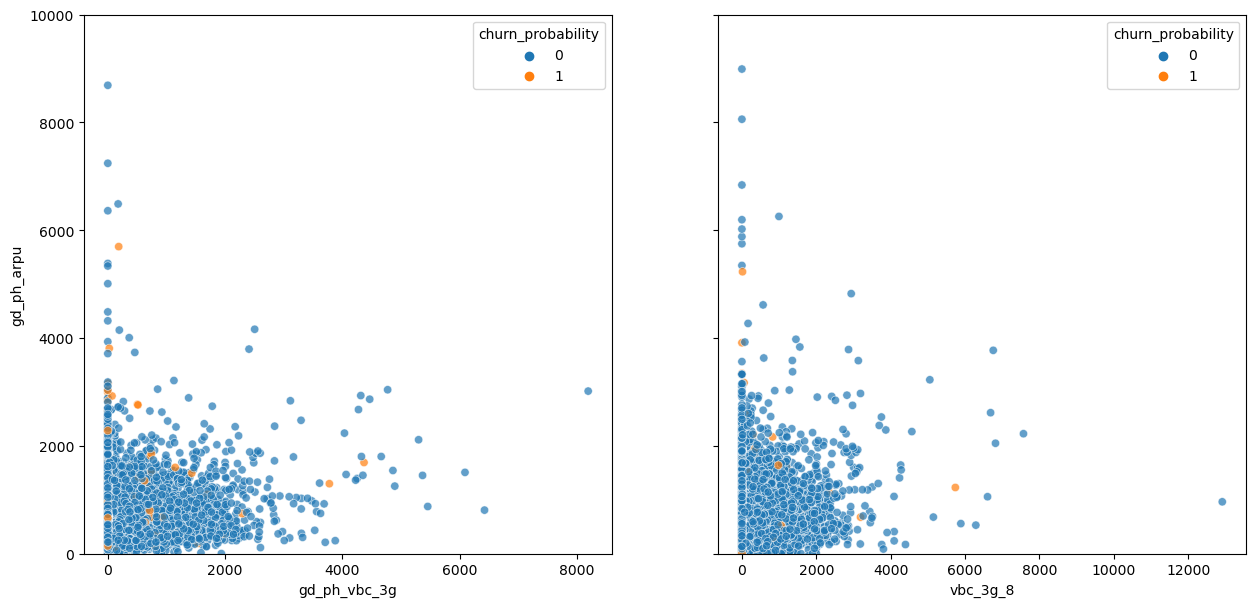

In [50]:
# Lets check how the total_mou effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=train_data, ax=axes[0], hue='churn_probability', alpha=0.7)
sns.scatterplot(y='arpu_8', x='vbc_3g_8', data=train_data, ax=axes[1], hue='churn_probability', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

#### Observation
- We can see that the users who were using very less amount of VBC data and yet were generating high revenue churned
- Yet again we see that the revenue is higher towards the lesser consumption side

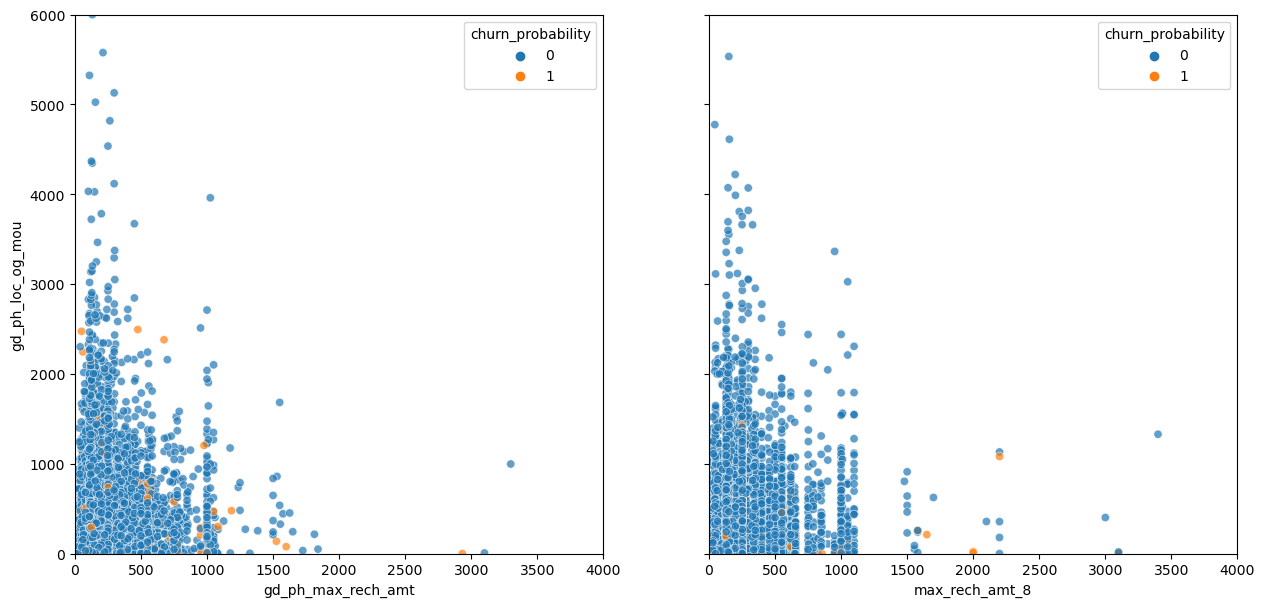

In [51]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=train_data, ax=axes[0],
                hue='churn_probability', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='loc_og_mou_8', data=train_data, ax=axes[1], hue='churn_probability', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

#### Observations
- Users who were recharging with high amounts were using the service for local uses less as compared to user who did lesser amounts of recharge
- Intuitevly people whose max recharge amount as well as local out going were very less even in the good phase churned more

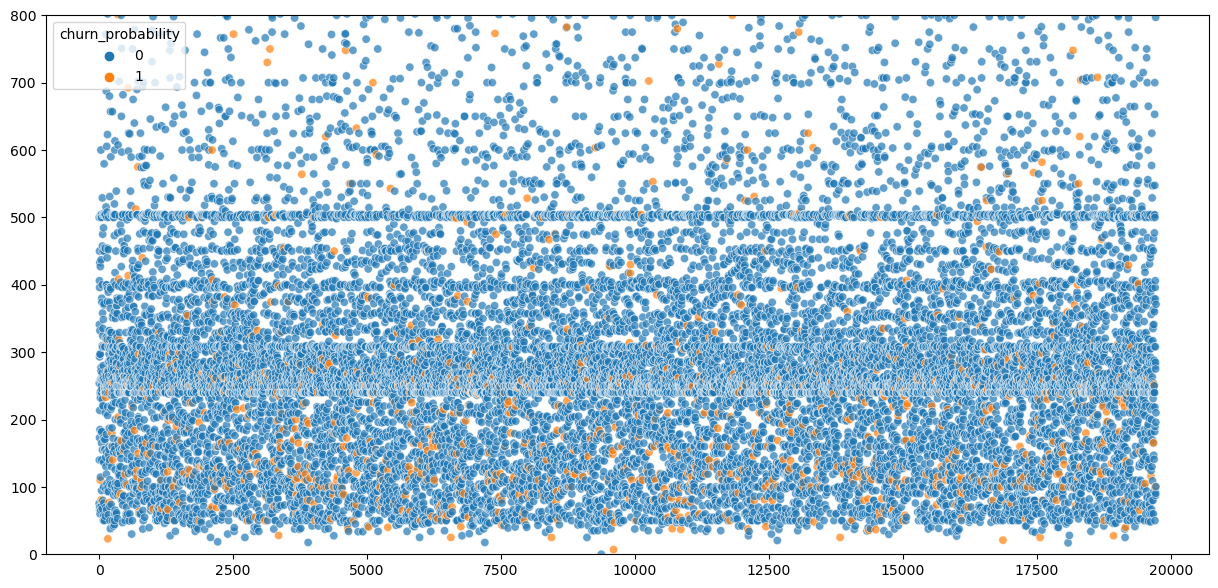

In [52]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=train_data.index, y=train_data['gd_ph_max_rech_amt'] + train_data['max_rech_amt_8'],
                hue=train_data['churn_probability'], alpha=0.7)
plt.ylim(0,800)
plt.show()

#### Observation
- We can see that users who had the max recharge amount less tha 800 churned more

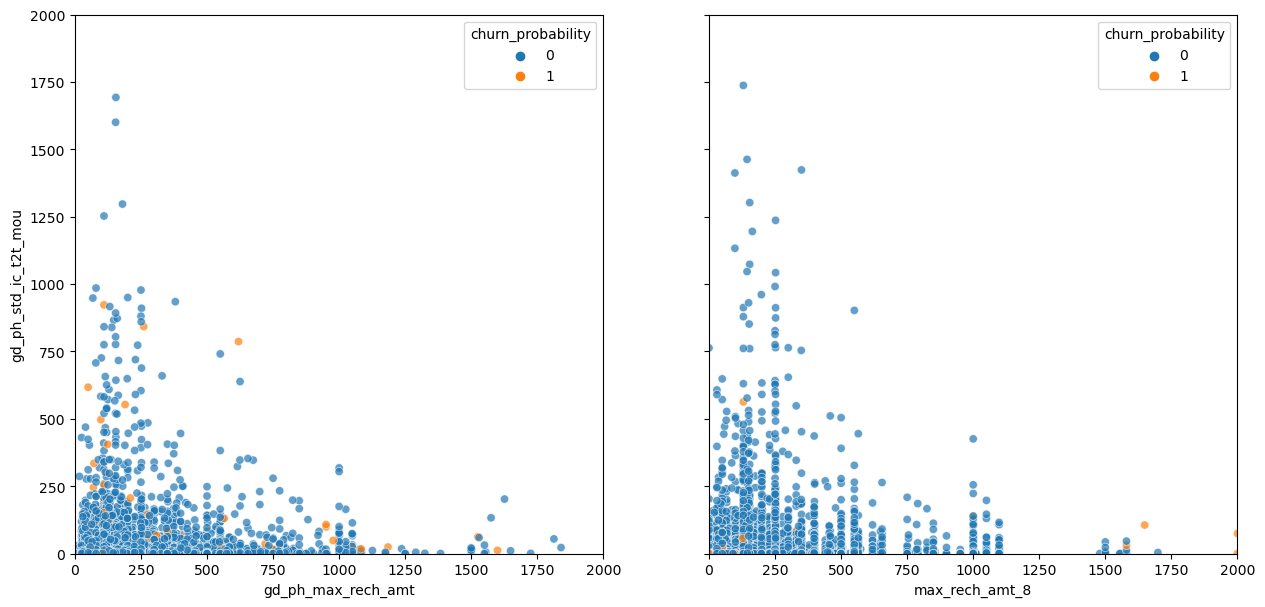

In [53]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=train_data, ax=axes[0],
                hue='churn_probability', alpha=0.7)
sns.scatterplot(x='max_rech_amt_8', y='std_ic_t2t_mou_8', data=train_data, ax=axes[1], hue='churn_probability', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

#### Observation
- Users who have max recharge amount on the higher end and still have low incoming call mou during the good pahse, churned out more

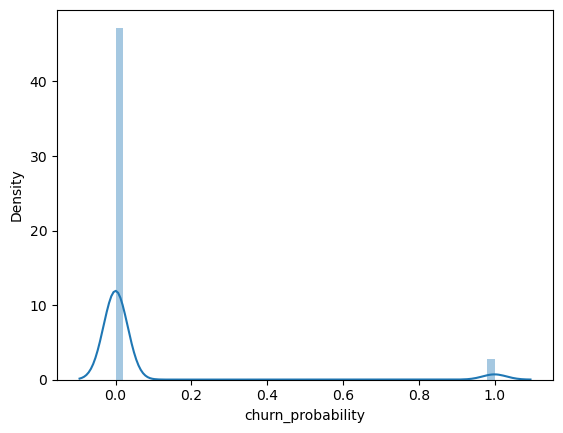

In [54]:
# Distribution of target variable

sns.distplot(train_data['churn_probability'])
plt.show()

#### Observation
- Though the varible is not skwed it is higly imbalanced, the number of non-churners in the dataset is around 94%
- We will handle this imbalance using SMOTE algorithm

## 4. Data Preperation

In [55]:
# Cap the features with high outliers

col_upr_lmt = [('arpu_8', 7000), ('loc_og_mou_8', 4000), ('max_rech_amt_8', 1000 ), ('last_day_rch_amt_8', 1000 ), 
               ('aon', 4000),  ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 4000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    train_data[col] = train_data[col].apply(lambda x : x if x < value else value)
    test_data[col] = test_data[col].apply(lambda x : x if x < value else value)

train_data[col_boxplot].head()

arpu_8  loc_og_mou_8  max_rech_amt_8  last_day_rch_amt_8   aon  \
0  101.565         15.76              30                  30   647   
1  338.286        385.26             250                 250   602   
2  479.762        387.79             144                  30   455   
3  240.449        129.73              30                  30  1219   
4  421.300        195.51             164                  61   573   

   gd_ph_loc_ic_mou  gd_ph_last_day_rch_amt  gd_ph_std_og_mou  \
0            15.450                    17.5             2.175   
1           504.770                    75.0             0.000   
2           419.795                    80.0           101.040   
3           184.600                    55.0           330.100   
4           317.035                   155.0             1.265   

   gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_arpu  
0                45.5            42.425    184.4495  
1               250.0           347.125    478.9215  
2               110.0           886.845   1018.2270  
3               110.0           255.110    362.0215  
4               177.0           154.710    370.7370

In [56]:
y = train_data['churn_probability']
X = train_data.drop('churn_probability', axis=1)

## Standardization

In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

### Handling Class Imbalance

In [58]:
train_data.churn_probability.value_counts()

0    18629
1     1092
Name: churn_probability, dtype: int64

In [59]:
# Use SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [60]:
y_res.value_counts()

0    18629
1    18629
Name: churn_probability, dtype: int64

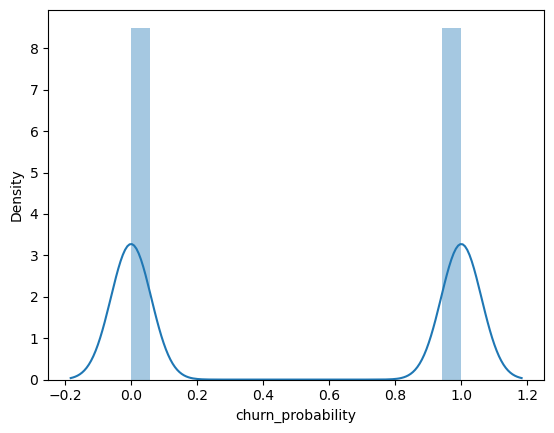

In [61]:
sns.distplot(y_res)
plt.show()

Now the class is balanced and the target variable is not skwed

### PCA

In [62]:
X.shape

(19721, 59)

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(37258, 25)

In [64]:
#remove after this imputing values
test_data_cols = test_data.columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=1)
#train_data_imputed = imputer.fit_transform(train_data)
test_data_imputed = imputer.fit_transform(test_data)

In [65]:
#test_data_filtered
# convert imputed numpy array to pandas dataframe 
test_data = pd.DataFrame(test_data_imputed, columns=test_data_cols)
print(test_data.isnull().sum()*100/test_data.shape[0])

id                        0.0
arpu_8                    0.0
roam_ic_mou_8             0.0
roam_og_mou_8             0.0
loc_og_t2c_mou_8          0.0
loc_og_mou_8              0.0
std_og_t2f_mou_8          0.0
std_og_mou_8              0.0
isd_og_mou_8              0.0
spl_og_mou_8              0.0
og_others_8               0.0
loc_ic_mou_8              0.0
std_ic_t2t_mou_8          0.0
std_ic_t2f_mou_8          0.0
std_ic_mou_8              0.0
spl_ic_mou_8              0.0
isd_ic_mou_8              0.0
ic_others_8               0.0
total_rech_num_8          0.0
max_rech_amt_8            0.0
last_day_rch_amt_8        0.0
vol_2g_mb_8               0.0
monthly_2g_8              0.0
sachet_2g_8               0.0
monthly_3g_8              0.0
sachet_3g_8               0.0
aon                       0.0
ic_sum                    0.0
oc_sum                    0.0
vol_sum                   0.0
total_mou_8               0.0
gd_ph_ic_others           0.0
gd_ph_vol_2g_mb           0.0
gd_ph_tota

In [66]:
from sklearn.decomposition import PCA

pca_test = PCA(n_components=25)
X_pca_test = pca_test.fit_transform(test_data)
X_pca_test.shape

(30000, 25)

In [67]:
from sklearn import metrics

## 5. Model Building

### 1. Logistic Regression

For logistic regression we will be using the unaltered X and y so that we can use RFE for feature selection instead of PCA, to find out the strong predictor of churn

In [68]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [69]:
import statsmodels.api as sm

In [70]:
# Initial logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26080
Model:                            GLM   Df Residuals:                    26020
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10993.
Date:                Wed, 18 Jan 2023   Deviance:                       21985.
Time:                        21:23:15   Pearson chi2:                 8.09e+04
No. Iterations:                    13   Pseudo R-squ. (CS):             0.4192
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.7114      0.040    -43.307      0.000      -1.789      -1.634
id                         0.0076      0.018      0.429      0.668      -0.027       0.042
arpu_8                     0.1495      0.060      2.486      0.013       0.032       0.267
roam_ic_mou_8           -847.3081    142.000     -5.967      0.000   -1125.624    -568.993
roam_og_mou_8              0.5795      0.315      1.839      0.066      -0.038       1.197
loc_og_t2c_mou_8           0.1200      0.065      1.835      0.066      -0.008       0.248
loc_og_mou_8              -0.2866      5.573     -0.051      0.959     -11.210      10.636
std_og_t2f_mou_8          -0.0446      0.042     -1.072      0.284      -0.126       0.037
std_og_mou_8               2.5005      1.790      1.397      0.162      -1.007       6.008
isd_og_mou_8               0.0460      0.174      0.265      0.791      -0.294       0.386
spl_og_mou_8              -0.1140      0.063     -1.817      0.069      -0.237       0.009
og_others_8               -1.7988      0.953     -1.887      0.059      -3.667       0.070
loc_ic_mou_8           -1.045e+04   1751.092     -5.969      0.000   -1.39e+04   -7019.490
std_ic_t2t_mou_8          -0.3745      0.081     -4.600      0.000      -0.534      -0.215
std_ic_t2f_mou_8          -0.1219      0.070     -1.745      0.081      -0.259       0.015
std_ic_mou_8           -4562.6758    764.623     -5.967      0.000   -6061.310   -3064.042
spl_ic_mou_8              -3.2347      0.422     -7.674      0.000      -4.061      -2.409
isd_ic_mou_8           -1636.6349    274.281     -5.967      0.000   -2174.215   -1099.055
ic_others_8             -167.0386     28.001     -5.965      0.000    -221.921    -112.157
total_rech_num_8          -0.5844      0.044    -13.201      0.000      -0.671      -0.498
max_rech_amt_8             0.2002      0.032      6.222      0.000       0.137       0.263
last_day_rch_amt_8        -0.4372      0.027    -16.236      0.000      -0.490      -0.384
vol_2g_mb_8               -0.2354      0.043     -5.504      0.000      -0.319      -0.152
monthly_2g_8              -0.5575      0.039    -14.296      0.000      -0.634      -0.481
sachet_2g_8               -0.5256      0.040    -13.096      0.000      -0.604      -0.447
monthly_3g_8              -0.5468      0.050    -10.853      0.000      -0.646      -0.448
sachet_3g_8               -0.1956      0.045     -4.390      0.000      -0.283      -0.108
aon                       -0.2877      0.021    -13.532      0.000      -0.329      -0.246
ic_sum                  1.198e+04   2007.148      5.967      0.000    8042.192    1.59e+04
oc_sum                     2.1545      9.307      0.231      0.817     -16.086      20.395
vol_sum                   -0.0848      0.046     -1.864      0.062      -0.174  

### RFE for Feature Selection

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression(solver='liblinear')

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [72]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_8', 'roam_og_mou_8', 'std_og_mou_8', 'og_others_8',
       'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'aon',
       'total_mou_8', 'gd_ph_vol_2g_mb', 'gd_ph_total_rech_num',
       'gd_ph_loc_ic_mou', 'gd_ph_monthly_2g', 'gd_ph_total_mou',
       'gd_ph_std_ic_t2t_mou', 'gd_ph_og_others', 'vbc_3g_8'],
      dtype='object')

In [73]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26080
Model:                            GLM   Df Residuals:                    26054
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11119.
Date:                Wed, 18 Jan 2023   Deviance:                       22238.
Time:                        21:23:42   Pearson chi2:                 7.77e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4135
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.6809      0.035    -47.444      0.000      -1.750      -1.612
arpu_8                   0.1979      0.038      5.220      0.000       0.124       0.272
roam_og_mou_8            0.3506      0.022     16.282      0.000       0.308       0.393
std_og_mou_8             0.7960      0.073     10.918      0.000       0.653       0.939
og_others_8             -1.6148      0.961     -1.681      0.093      -3.497       0.268
loc_ic_mou_8            -1.8745      0.077    -24.485      0.000      -2.025      -1.724
std_ic_t2t_mou_8        -0.4234      0.075     -5.614      0.000      -0.571      -0.276
std_ic_mou_8            -0.2920      0.049     -5.935      0.000      -0.388      -0.196
spl_ic_mou_8            -0.7395      0.046    -15.923      0.000      -0.831      -0.648
total_rech_num_8        -0.6917      0.042    -16.595      0.000      -0.773      -0.610
max_rech_amt_8           0.2245      0.029      7.775      0.000       0.168       0.281
last_day_rch_amt_8      -0.4425      0.026    -17.054      0.000      -0.493      -0.392
vol_2g_mb_8             -0.2819      0.042     -6.786      0.000      -0.363      -0.200
monthly_2g_8            -0.5784      0.037    -15.510      0.000      -0.652      -0.505
sachet_2g_8             -0.5063      0.032    -15.777      0.000      -0.569      -0.443
monthly_3g_8            -0.5760      0.037    -15.482      0.000      -0.649      -0.503
aon                     -0.2948      0.021    -14.179      0.000      -0.336      -0.254
total_mou_8             -1.4600      0.092    -15.879      0.000      -1.640      -1.280
gd_ph_vol_2g_mb          0.1582      0.029      5.530      0.000       0.102       0.214
gd_ph_total_rech_num     0.3193      0.032      9.836      0.000       0.256       0.383
gd_ph_loc_ic_mou         0.6478      0.048     13.386      0.000       0.553       0.743
gd_ph_monthly_2g        -0.1989      0.029     -6.743      0.000      -0.257      -0.141
gd_ph_total_mou          0.5579      0.031     18.047      0.000       0.497       0.618
gd_ph_std_ic_t2t_mou     0.2716      0.037      7.351      0.000       0.199       0.344
gd_ph_og_others         -0.3731      0.051     -7.300      0.000      -0.473      -0.273
vbc_3g_8                -0.1584      0.034     -4.606      0.000      -0.226      -0.091
========================================================================================
"""

In [74]:
# Predict on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.031007          0
1      0    0.018052          0
2      1    0.875398          1
3      0    0.002378          0
4      0    0.000916          0

In [75]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[10280  2703]
 [ 1999 11098]]

Accuracy : 0.8197085889570552


In [76]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
16           total_mou_8  9.31
2           std_og_mou_8  5.99
0                 arpu_8  4.37
4           loc_ic_mou_8  3.84
8       total_rech_num_8  3.42
19      gd_ph_loc_ic_mou  3.27
9         max_rech_amt_8  2.69
18  gd_ph_total_rech_num  2.49
21       gd_ph_total_mou  2.28
11           vol_2g_mb_8  2.00
5       std_ic_t2t_mou_8  1.99
10    last_day_rch_amt_8  1.99
17       gd_ph_vol_2g_mb  1.98
20      gd_ph_monthly_2g  1.85
12          monthly_2g_8  1.82
6           std_ic_mou_8  1.82
14          monthly_3g_8  1.55
24              vbc_3g_8  1.49
13           sachet_2g_8  1.44
1          roam_og_mou_8  1.34
22  gd_ph_std_ic_t2t_mou  1.28
15                   aon  1.20
23       gd_ph_og_others  1.16
3            og_others_8  1.10
7           spl_ic_mou_8  1.05

Since the VIF for `total_mou_8` is very high we will drop it

In [77]:
rfe_col = rfe_col.drop('total_mou_8', 1)

In [78]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26080
Model:                            GLM   Df Residuals:                    26055
Model Family:                Binomial   Df Model:                           24
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11279.
Date:                Wed, 18 Jan 2023   Deviance:                       22557.
Time:                        21:23:44   Pearson chi2:                 6.67e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7054      0.037    -46.162      0.000      -1.778      -1.633
arpu_8                  -0.0286      0.036     -0.797      0.426      -0.099       0.042
roam_og_mou_8            0.2258      0.020     11.229      0.000       0.186       0.265
std_og_mou_8            -0.1788      0.031     -5.836      0.000      -0.239      -0.119
og_others_8             -1.7269      1.091     -1.583      0.114      -3.866       0.412
loc_ic_mou_8            -2.3857      0.073    -32.611      0.000      -2.529      -2.242
std_ic_t2t_mou_8        -0.4333      0.076     -5.734      0.000      -0.581      -0.285
std_ic_mou_8            -0.2718      0.048     -5.610      0.000      -0.367      -0.177
spl_ic_mou_8            -0.7261      0.046    -15.817      0.000      -0.816      -0.636
total_rech_num_8        -0.8058      0.042    -19.350      0.000      -0.887      -0.724
max_rech_amt_8           0.2548      0.028      8.993      0.000       0.199       0.310
last_day_rch_amt_8      -0.4641      0.026    -17.926      0.000      -0.515      -0.413
vol_2g_mb_8             -0.2672      0.041     -6.458      0.000      -0.348      -0.186
monthly_2g_8            -0.5728      0.037    -15.315      0.000      -0.646      -0.499
sachet_2g_8             -0.5113      0.032    -15.776      0.000      -0.575      -0.448
monthly_3g_8            -0.5363      0.037    -14.402      0.000      -0.609      -0.463
aon                     -0.3106      0.021    -15.052      0.000      -0.351      -0.270
gd_ph_vol_2g_mb          0.1488      0.029      5.191      0.000       0.093       0.205
gd_ph_total_rech_num     0.4241      0.032     13.128      0.000       0.361       0.487
gd_ph_loc_ic_mou         0.7076      0.049     14.571      0.000       0.612       0.803
gd_ph_monthly_2g        -0.2066      0.030     -6.983      0.000      -0.265      -0.149
gd_ph_total_mou          0.3386      0.026     13.041      0.000       0.288       0.389
gd_ph_std_ic_t2t_mou     0.2919      0.038      7.712      0.000       0.218       0.366
gd_ph_og_others         -0.3886      0.051     -7.594      0.000      -0.489      -0.288
vbc_3g_8                -0.1424      0.035     -4.113      0.000      -0.210      -0.075
========================================================================================
"""

In [79]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.029138          0
1      0    0.013070          0
2      1    0.879926          1
3      0    0.001987          0
4      0    0.000420          0

In [80]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[10169  2814]
 [ 2036 11061]]

Accuracy : 0.8140337423312883


In [81]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                 arpu_8  3.74
4           loc_ic_mou_8  3.65
8       total_rech_num_8  3.34
18      gd_ph_loc_ic_mou  3.27
9         max_rech_amt_8  2.68
17  gd_ph_total_rech_num  2.41
2           std_og_mou_8  2.38
20       gd_ph_total_mou  2.01
11           vol_2g_mb_8  2.00
5       std_ic_t2t_mou_8  1.99
10    last_day_rch_amt_8  1.98
16       gd_ph_vol_2g_mb  1.97
19      gd_ph_monthly_2g  1.85
12          monthly_2g_8  1.82
6           std_ic_mou_8  1.82
14          monthly_3g_8  1.54
23              vbc_3g_8  1.49
13           sachet_2g_8  1.44
21  gd_ph_std_ic_t2t_mou  1.28
1          roam_og_mou_8  1.27
15                   aon  1.19
22       gd_ph_og_others  1.16
3            og_others_8  1.10
7           spl_ic_mou_8  1.05

In [83]:
# Drop 'arpu_8'
rfe_col = rfe_col.drop('arpu_8', 1)

In [84]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26080
Model:                            GLM   Df Residuals:                    26056
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11279.
Date:                Wed, 18 Jan 2023   Deviance:                       22558.
Time:                        21:24:40   Pearson chi2:                 6.72e+04
No. Iterations:                    10   Pseudo R-squ. (CS):             0.4063
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7073      0.037    -46.403      0.000      -1.779      -1.635
roam_og_mou_8            0.2208      0.019     11.566      0.000       0.183       0.258
std_og_mou_8            -0.1873      0.029     -6.546      0.000      -0.243      -0.131
og_others_8             -1.7308      1.082     -1.600      0.110      -3.851       0.389
loc_ic_mou_8            -2.3975      0.072    -33.447      0.000      -2.538      -2.257
std_ic_t2t_mou_8        -0.4338      0.076     -5.735      0.000      -0.582      -0.286
std_ic_mou_8            -0.2732      0.048     -5.638      0.000      -0.368      -0.178
spl_ic_mou_8            -0.7262      0.046    -15.816      0.000      -0.816      -0.636
total_rech_num_8        -0.8165      0.039    -20.696      0.000      -0.894      -0.739
max_rech_amt_8           0.2453      0.026      9.536      0.000       0.195       0.296
last_day_rch_amt_8      -0.4660      0.026    -18.068      0.000      -0.517      -0.415
vol_2g_mb_8             -0.2676      0.041     -6.470      0.000      -0.349      -0.187
monthly_2g_8            -0.5730      0.037    -15.329      0.000      -0.646      -0.500
sachet_2g_8             -0.5099      0.032    -15.755      0.000      -0.573      -0.446
monthly_3g_8            -0.5393      0.037    -14.565      0.000      -0.612      -0.467
aon                     -0.3110      0.021    -15.079      0.000      -0.351      -0.271
gd_ph_vol_2g_mb          0.1485      0.029      5.180      0.000       0.092       0.205
gd_ph_total_rech_num     0.4259      0.032     13.215      0.000       0.363       0.489
gd_ph_loc_ic_mou         0.7083      0.049     14.583      0.000       0.613       0.804
gd_ph_monthly_2g        -0.2060      0.030     -6.964      0.000      -0.264      -0.148
gd_ph_total_mou          0.3363      0.026     13.047      0.000       0.286       0.387
gd_ph_std_ic_t2t_mou     0.2923      0.038      7.713      0.000       0.218       0.367
gd_ph_og_others         -0.3884      0.051     -7.589      0.000      -0.489      -0.288
vbc_3g_8                -0.1440      0.035     -4.164      0.000      -0.212      -0.076
========================================================================================
"""

In [85]:
# Predict on train data
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.028783          0
1      0    0.013107          0
2      1    0.880664          1
3      0    0.001941          0
4      0    0.000404          0

In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[10164  2819]
 [ 2032 11065]]

Accuracy : 0.8139953987730061


In [87]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3           loc_ic_mou_8  3.59
17      gd_ph_loc_ic_mou  3.26
7       total_rech_num_8  2.82
16  gd_ph_total_rech_num  2.39
8         max_rech_amt_8  2.23
1           std_og_mou_8  2.07
10           vol_2g_mb_8  2.00
4       std_ic_t2t_mou_8  1.99
19       gd_ph_total_mou  1.98
15       gd_ph_vol_2g_mb  1.97
9     last_day_rch_amt_8  1.97
18      gd_ph_monthly_2g  1.85
5           std_ic_mou_8  1.82
11          monthly_2g_8  1.81
22              vbc_3g_8  1.48
13          monthly_3g_8  1.46
12           sachet_2g_8  1.43
20  gd_ph_std_ic_t2t_mou  1.28
14                   aon  1.19
21       gd_ph_og_others  1.16
0          roam_og_mou_8  1.12
2            og_others_8  1.10
6           spl_ic_mou_8  1.05

In [88]:
# Drop 'total_mou_8'
rfe_col = rfe_col.drop('loc_ic_mou_8', 1)

In [89]:
# Build new model

X_train_sm = sm.add_constant(X_train[rfe_col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:      churn_probability   No. Observations:                26080
Model:                            GLM   Df Residuals:                    26057
Model Family:                Binomial   Df Model:                           22
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12048.
Date:                Wed, 18 Jan 2023   Deviance:                       24096.
Time:                        21:25:07   Pearson chi2:                 1.04e+05
No. Iterations:                    10   Pseudo R-squ. (CS):             0.3702
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.3613      0.038    -36.104      0.000      -1.435      -1.287
roam_og_mou_8            0.3576      0.021     17.426      0.000       0.317       0.398
std_og_mou_8            -0.1939      0.028     -6.966      0.000      -0.248      -0.139
og_others_8             -2.7123      1.471     -1.844      0.065      -5.595       0.170
std_ic_t2t_mou_8        -0.4925      0.080     -6.185      0.000      -0.649      -0.336
std_ic_mou_8            -0.4635      0.053     -8.718      0.000      -0.568      -0.359
spl_ic_mou_8            -0.7595      0.046    -16.408      0.000      -0.850      -0.669
total_rech_num_8        -1.2452      0.039    -32.088      0.000      -1.321      -1.169
max_rech_amt_8           0.1353      0.024      5.569      0.000       0.088       0.183
last_day_rch_amt_8      -0.5240      0.026    -20.133      0.000      -0.575      -0.473
vol_2g_mb_8             -0.2781      0.041     -6.717      0.000      -0.359      -0.197
monthly_2g_8            -0.5778      0.036    -15.870      0.000      -0.649      -0.506
sachet_2g_8             -0.5041      0.032    -15.525      0.000      -0.568      -0.440
monthly_3g_8            -0.5081      0.036    -14.168      0.000      -0.578      -0.438
aon                     -0.3843      0.019    -19.712      0.000      -0.423      -0.346
gd_ph_vol_2g_mb          0.1410      0.028      4.992      0.000       0.086       0.196
gd_ph_total_rech_num     0.6641      0.032     21.009      0.000       0.602       0.726
gd_ph_loc_ic_mou        -0.6073      0.027    -22.315      0.000      -0.661      -0.554
gd_ph_monthly_2g        -0.2125      0.028     -7.498      0.000      -0.268      -0.157
gd_ph_total_mou          0.3409      0.025     13.741      0.000       0.292       0.389
gd_ph_std_ic_t2t_mou     0.3784      0.038      9.897      0.000       0.303       0.453
gd_ph_og_others         -0.3804      0.051     -7.524      0.000      -0.479      -0.281
vbc_3g_8                -0.1846      0.034     -5.443      0.000      -0.251      -0.118
========================================================================================
"""

In [90]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.117785          0
1      0    0.247344          0
2      1    0.918222          1
3      0    0.110202          0
4      0    0.001209          0

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[ 9983  3000]
 [ 2277 10820]]

Accuracy : 0.7976610429447852


In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6       total_rech_num_8  2.68
15  gd_ph_total_rech_num  2.34
7         max_rech_amt_8  2.23
1           std_og_mou_8  2.07
9            vol_2g_mb_8  2.00
3       std_ic_t2t_mou_8  1.99
18       gd_ph_total_mou  1.98
14       gd_ph_vol_2g_mb  1.97
8     last_day_rch_amt_8  1.96
17      gd_ph_monthly_2g  1.85
4           std_ic_mou_8  1.81
10          monthly_2g_8  1.81
21              vbc_3g_8  1.48
12          monthly_3g_8  1.46
11           sachet_2g_8  1.43
19  gd_ph_std_ic_t2t_mou  1.28
16      gd_ph_loc_ic_mou  1.21
13                   aon  1.18
20       gd_ph_og_others  1.16
0          roam_og_mou_8  1.12
2            og_others_8  1.10
5           spl_ic_mou_8  1.05

In [ ]:
# Drop multiple columns 
#df2_test_data = test_data.drop(rfe_col, axis=1)
#df2_test_data= test_data.loc[:, test_data.columns.isin(rfe_col)]
#print(df2_test_data) 

In [ ]:
#df2_test_data.columns
#df2_test_data.columns

In [ ]:
#df2_test_data.shape

In [ ]:
#len(rfe_col)

The VIF values looks good now, we can proceed further

In [93]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [94]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8261433916164007

In [95]:
# Let us calculate specificity
TN / float(TN+FP)

0.7689285989370716

In [96]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.23107140106292845


In [97]:
# positive predictive value 
print (TP / float(TP+FP))

0.7829232995658466


In [98]:
# Negative predictive value
print (TN / float(TN+ FN))

0.814274061990212


### Plotting ROC

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

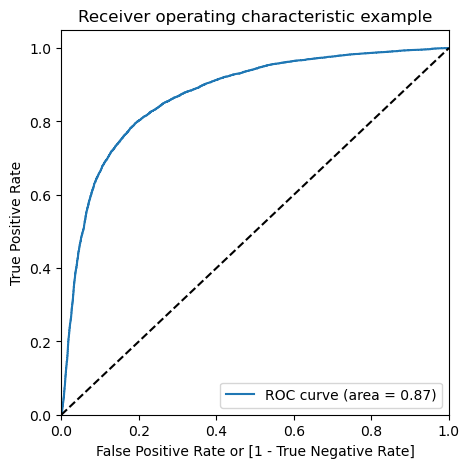

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

#### Optimal cutoff point

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.117785          0    1    1    0    0    0    0    0    0    0   
1      0    0.247344          0    1    1    1    0    0    0    0    0    0   
2      1    0.918222          1    1    1    1    1    1    1    1    1    1   
3      0    0.110202          0    1    1    0    0    0    0    0    0    0   
4      0    0.001209          0    1    0    0    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    1  
3    0  
4    0

In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.502186  1.000000  0.000000
0.1   0.1  0.638765  0.977170  0.297389
0.2   0.2  0.707209  0.955715  0.456520
0.3   0.3  0.748658  0.922425  0.573365
0.4   0.4  0.779601  0.879591  0.678734
0.5   0.5  0.797661  0.826143  0.768929
0.6   0.6  0.797316  0.745743  0.849341
0.7   0.7  0.772929  0.633886  0.913194
0.8   0.8  0.699156  0.444835  0.955711
0.9   0.9  0.574617  0.168817  0.983979


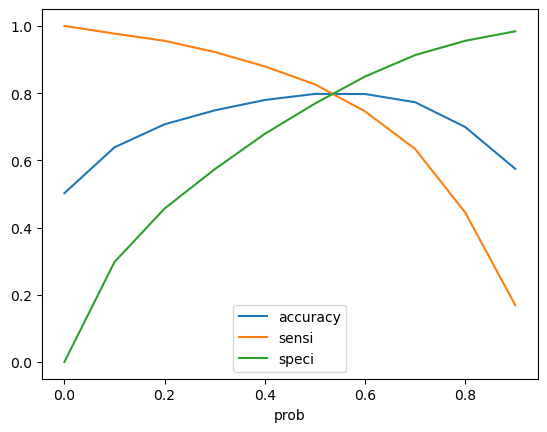

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The point 0.5 is optimal for our model, so we will keep that

In [104]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
33364      1    0.712811          1
24479      1    0.885577          1
15145      0    0.073297          0
4377       0    0.103750          0
3213       0    0.894381          1

#### Predicting the churn values for test dataset

In [105]:
# prediction of test_data purpose
test_data_X_test = test_data[rfe_col]
test_data_X_test_sm = sm.add_constant(test_data_X_test)

# Predict on test data

y_test_data_pred_yarra = res.predict(test_data_X_test_sm)

In [106]:
#y_test_data_pred_yarra
y_test_data_pred_yarra_final = pd.DataFrame({'Churn_Prob':y_test_data_pred_yarra})
y_test_data_pred_yarra_final['predicted'] = y_test_data_pred_yarra_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_data_pred_yarra_final.head()

Churn_Prob  predicted
0  2.392212e-286          0
1   0.000000e+00          0
2   1.363039e-46          0
3   0.000000e+00          0
4  1.117588e-124          0

In [107]:
df4_yarra = pd.concat([test_data,y_test_data_pred_yarra_final], axis=1, join='inner')

In [108]:
df4_yarra['churn_probability'] = df4_yarra['predicted']

In [109]:
df4_yarra['id']=df4_yarra['id'].astype("Int32")

In [110]:
df4_yarra.to_csv('sample_submission_Jan18_RFE1.csv', columns = ['id','churn_probability'],index=False)

In [111]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[4349 1297]
 [ 960 4572]]

Accuracy : 0.7980855251386653


In [112]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:11]

og_others_8             2.712281
const                   1.361321
total_rech_num_8        1.245165
spl_ic_mou_8            0.759544
gd_ph_total_rech_num    0.664055
gd_ph_loc_ic_mou        0.607313
monthly_2g_8            0.577756
last_day_rch_amt_8      0.524009
monthly_3g_8            0.508077
sachet_2g_8             0.504100
std_ic_t2t_mou_8        0.492516
dtype: float64

#### Observations
- So using Logistic regression we are geting an accuracy of 81.4% on train data and 82.5% on test data
- We can clearly see most of the critical features are form the action phase, which is inline with the bussiness understanding that action phase needs more attention

### 2. Decission Tree

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [114]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)
#y_test_pred_yarra = intial_dt.predict(X_pca_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8975460122699387
              precision    recall  f1-score   support

           0       0.88      0.83      0.86      5646
           1       0.84      0.89      0.86      5532

    accuracy                           0.86     11178
   macro avg       0.86      0.86      0.86     11178
weighted avg       0.86      0.86      0.86     11178



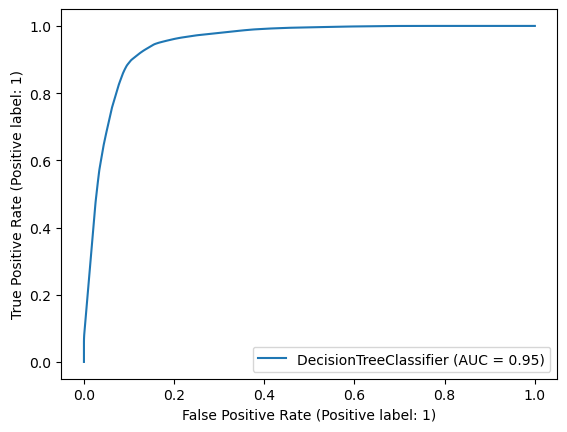

In [115]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

### Hyperparameter tuning

In [116]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [117]:
grid_search.best_score_

0.877569018404908

In [118]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, random_state=42)

In [119]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      5646
           1       0.87      0.92      0.89      5532

    accuracy                           0.89     11178
   macro avg       0.89      0.89      0.89     11178
weighted avg       0.89      0.89      0.89     11178



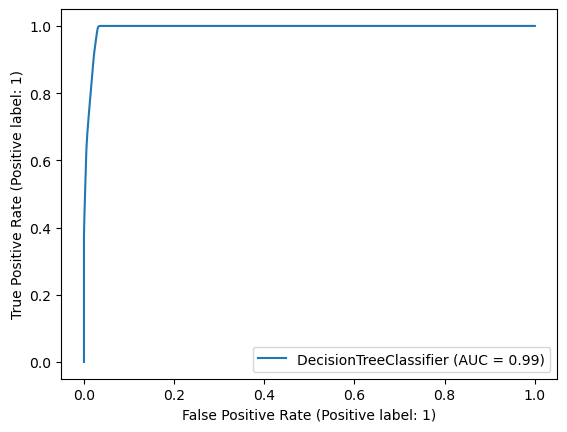

In [120]:
# ROC
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

We are getting an accuracy of 88% on test data, with decission tree

### 3. Random Forest

Train accuracy : 0.8975460122699387
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5646
           1       0.88      0.90      0.89      5532

    accuracy                           0.89     11178
   macro avg       0.89      0.89      0.89     11178
weighted avg       0.89      0.89      0.89     11178



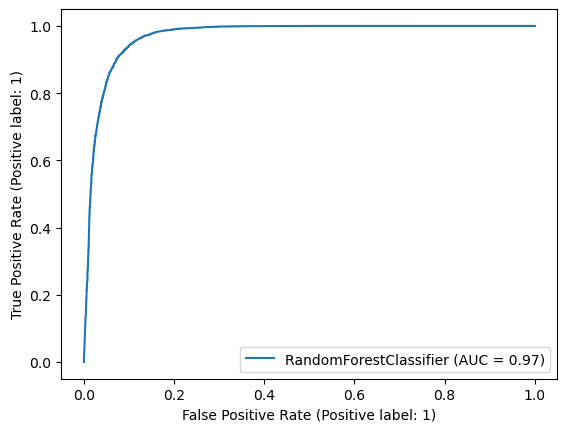

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

### Hyperparameter tuning

In [122]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [123]:
grid_search.best_score_

0.9210889570552148

In [124]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [125]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      5646
           1       0.92      0.95      0.93      5532

    accuracy                           0.93     11178
   macro avg       0.93      0.93      0.93     11178
weighted avg       0.93      0.93      0.93     11178



In [126]:
test_data_X_test = test_data[rfe_col]

In [127]:
test_data.shape

(30000, 59)

In [128]:
y_test_data_X_test_pred_Random_yarra = rf_best.predict(X_pca_test)

In [129]:
len(y_test_data_X_test_pred_Random_yarra)

30000

In [130]:
y_test_data_pred_Random_yarra_final = pd.DataFrame({'churn_probability':y_test_data_X_test_pred_Random_yarra})
#y_test_data_pred_Random_yarra_final['predicted'] = y_test_data_pred_Random__yarra_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_data_pred_Random_yarra_final.head()


churn_probability
0                  0
1                  0
2                  0
3                  0
4                  0

In [131]:
Random_yarra = pd.concat([test_data,y_test_data_pred_Random_yarra_final], axis=1, join='inner')

#Random_yarra.to_csv('sample_submission_random_Jan18.csv', columns = ['id','churn_probability'],index=False)

In [132]:
Random_yarra['id']=Random_yarra['id'].astype("Int32")

In [133]:
Random_yarra.to_csv('sample_submission_random_new.csv', columns = ['id','churn_probability'],index=False)

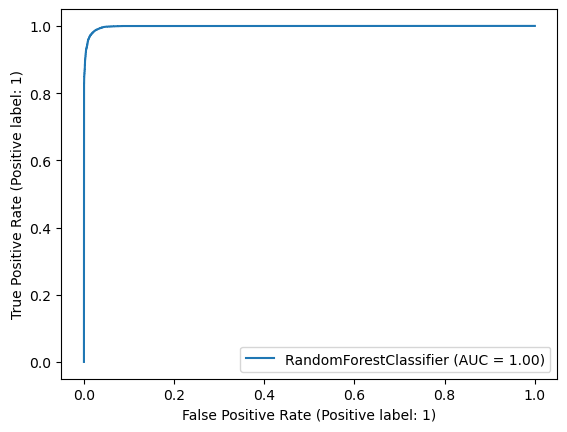

In [134]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

We are getting an accuracy of 93% on test data, with Random forest yarra

### 4. Adaboost

In [135]:
from sklearn.ensemble import AdaBoostClassifier

In [136]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.7613168724279835

In [137]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

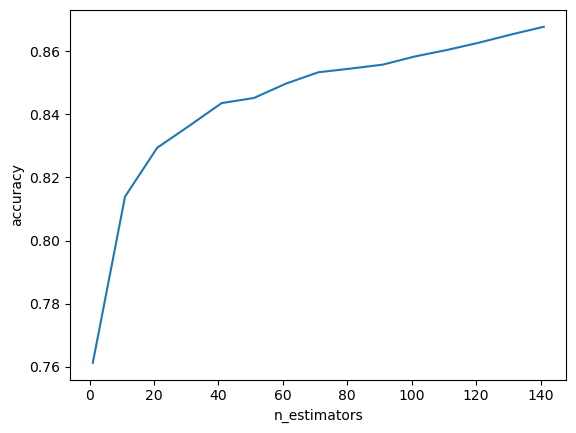

In [138]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [139]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      5646
           1       0.92      0.95      0.93      5532

    accuracy                           0.93     11178
   macro avg       0.93      0.93      0.93     11178
weighted avg       0.93      0.93      0.93     11178



In [140]:
y_pred = adaboost_best.predict(X_pca_test)
y_pred_df = pd.DataFrame({'churn_probability':y_pred})
adaboost_yarra = pd.concat([test_data,y_pred_df], axis=1, join='inner')
adaboost_yarra['id']=adaboost_yarra['id'].astype("Int32")
adaboost_yarra.to_csv('sample_submission.csv', columns = ['id','churn_probability'],index=False)

## Conclusion

- Given our bussines probelm, to retain their customers, we need higher recall. As giving an offer to an user not going to churn will cost less as compared to loosing a customer and bring new customer, we need to have high rate of correctly identifying the true positives, hence recall.
- When we compare the models trained we can see the tuned random forest and ada boost are performing the best, which is highest accuracy along with highest recall i.e. `98% & 93%` respectively. So, we will go with `Random forest instead of Adaboost` as that is comparetively simpler model.

In [141]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,random_state=25)

In [142]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12983
           1       0.97      0.99      0.98     13097

    accuracy                           0.98     26080
   macro avg       0.98      0.98      0.98     26080
weighted avg       0.98      0.98      0.98     26080

Report on test data
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      5646
           1       0.92      0.95      0.93      5532

    accuracy                           0.93     11178
   macro avg       0.93      0.93      0.93     11178
weighted avg       0.93      0.93      0.93     11178



### Strategies to Manage Customer Churn

- The top 10 predictors are :
|Features|
|--------|
|og_others_8|
|oc_sum|
|total_rech_num_8|
|spl_ic_mou_8|
|monthly_2g_8|
|monthly_3g_8|
|gd_ph_total_rech_num|
|sachet_2g_8|
|std_ic_t2t_mou_8|
|last_day_rch_amt_8|

- We can see most of the top predictors are from the action phase, as the drop in engagement is prominent in that phase
Some of the factors we noticed while performing EDA which can be clubed with these inshigts are:

1. Users whose maximum recharge amount is less than `800` even in the good phase, should have a tag and re-evaluated time to time as they are more likely to churn
2. Users that have been with the network less than `4 or 5 years`, should be monitored time to time, as from data we can see that users who have been associated with the network for less than 4 or 5 years tend to churn more
3. MOU is one of the major factors, but data especially `VBC` if the user is not using a data pack if another factor to look out